In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scanpy as sc
from collections import Counter

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'

# Computing correlation between cell proportion and clinical info 

In [18]:
###Rsquared and pvalue were computed by default 
import statsmodels.api as sm
def stat_single_OLS(df_subset:pd.DataFrame):
    x = df_subset.ratio.values
    X = sm.add_constant(x)
    model=sm.OLS(df_subset.serum.values, X).fit()
    return model.f_pvalue, model.rsquared, model, x
def draw_lineplot(plot_df,y_axis_name=None,path=None):
    fig, ax = plt.subplots(figsize=(4, 4),dpi=80)
    ax.scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    ax.plot(x,result.fittedvalues,'#6699CC')
    ax.set_xlabel('proportion of subtype')
    ax.set_ylabel(y_axis_name)
    if path:
        plt.savefig(path, dpi=1000)

In [23]:
###R and p-value were computed by spearman correlation
import statsmodels.api as sm
import scipy
def stat_single_OLS(df_subset:pd.DataFrame):
    x = df_subset.ratio.values
    X = sm.add_constant(x)
    model=sm.OLS(df_subset.serum.values, X).fit()
    cor=scipy.stats.spearmanr(df_subset.ratio.values,df_subset.serum.values)
    return cor[1], cor[0], model, x
def draw_lineplot(plot_df,path=None):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    ax.plot(x,result.fittedvalues,'#6699CC')
    ax.set_xlabel('proportion of subtype')
    ax.set_ylabel('expression in plasma (pg/ml)')
    if path:
        plt.savefig(path, dpi=1000)

In [12]:
types=['course of disease','Focus score','Salivary flow rate','ESSDAI score',
 'WBC','HGB','PLT','neutral','lymph','RF(IU/ml)',
 'IgG(g/l)','IgM(g/l)','IgA(g/l)',
 'globulin(g/L)','C4(mg/dl)','C3(mg/dl)','ESR(mm/hr)','CRP(mg/l)']
cell_types=['B', 'CD4_T', 'CD8_T', 'Ductal', 'Endothelial_ACKR1_CCL14', 
            'Endothelial_CA4', 'Endothelial_RGS5', 'Fibroblast', 'Ionocytes', 'Mac/mo', 
            'Mast', 'Melanocytes', 'Mucous_acini', 'Myoepithelial', 'Myofibroblast', 'Pericytes', 
            'Plasma', 'Serous_acini']

In [4]:
### Loading data of cell proportion
ratio_df=pd.read_csv('./data/cx_celltype_major_sample_proportion_1.csv',index_col=0)
#
meta_df=pd.read_csv('./data/refined_clinical_info.csv',index_col='sample_ID')
meta_df=meta_df.loc[ratio_df.index]
#meta_df

In [5]:
ratio_df.shape,meta_df.shape

((16, 18), (16, 24))

In [6]:
ratio_df.head()

,B,CD4_T,CD8_T,Ductal,Endothelial_ACKR1_CCL14,Endothelial_CA4,Endothelial_RGS5,Fibroblast,Ionocytes,Mac/mo,Mast,Melanocytes,Mucous_acini,Myoepithelial,Myofibroblast,Pericytes,Plasma,Serous_acini
HCCX_1,0.001809,0.017183,0.048837,0.010465,0.024935,0.058140,0.021447,0.276873,0.000775,0.046253,0.000129,0.016925,0.056331,0.150388,0.055168,0.012532,0.015504,0.186305
HCCX_2,0.000633,0.011713,0.031656,0.046217,0.001266,0.003799,0.000950,0.024691,0.012979,0.002849,0.000000,0.001583,0.011713,0.040203,0.001266,0.001583,0.007597,0.799304
HCCX_3,0.013088,0.019965,0.052130,0.009760,0.029059,0.080080,0.015306,0.389973,0.001109,0.033052,0.000000,0.013310,0.024401,0.035714,0.018412,0.031721,0.083851,0.149068
HCCX_4,0.012894,0.047892,0.077978,0.015145,0.009415,0.019239,0.003275,0.327466,0.001433,0.053623,0.005321,0.006959,0.058125,0.022923,0.030700,0.008391,0.124642,0.174580
HCCX_5,0.005391,0.047320,0.112609,0.049416,0.000599,0.002995,0.000299,0.036837,0.015574,0.006589,0.000000,0.004193,0.019167,0.069781,0.000000,0.001198,0.006888,0.621144


In [15]:
meta_df.iloc[:,8:].head()

,ESSDAI score,WBC,HGB,PLT,neutral,lymph,RF(IU/ml),IgG(g/l),High IgG(>16),IgM(g/l),IgA(g/l),globulin(g/L),C4(mg/dl),C3(mg/dl),ESR(mm/hr),CRP(mg/l)
HCCX_1,NaN,5.03,119,194,2.70,2.08,NaN,12.00,-,1.08,2.39,NaN,0.26,0.74,3,3.30
HCCX_2,NaN,5.38,147,275,2.83,2.24,NaN,14.90,-,1.16,3.09,NaN,0.25,1.32,12,NaN
HCCX_3,NaN,5.80,134,193,3.10,1.84,9.19,14.71,-,1.24,2.75,30.2,0.33,1.00,10,3.13
HCCX_4,NaN,5.57,105,157,3.29,1.85,9.19,15.73,-,2.24,1.74,NaN,NaN,NaN,5,3.13
HCCX_5,NaN,7.04,147,206,4.40,2.10,9.19,15.94,-,0.65,2.79,33.1,0.24,0.98,5,3.13


0.5373588214773258 0.043690053513158134


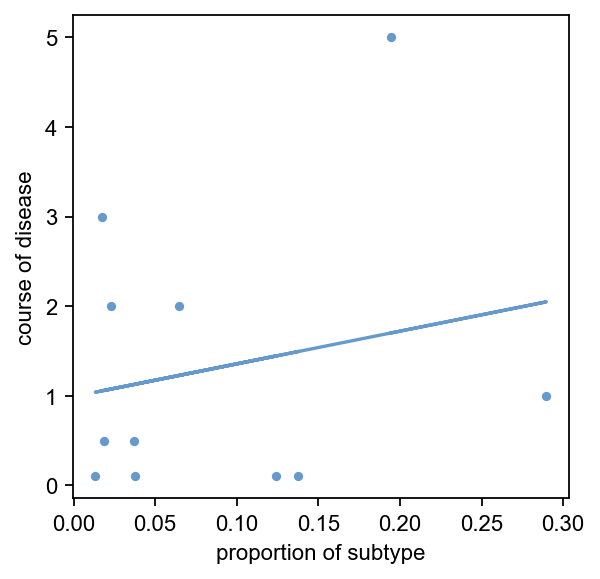

In [43]:
###create two dataframe for subtype ratio and one type of clinical info as an example
plot_df1=ratio_df['B']
plot_df2=meta_df['course of disease']
plot_df=pd.DataFrame([plot_df1,plot_df2]).T
plot_df.columns=['ratio','serum']
plot_df=plot_df.dropna()
#
draw_lineplot(plot_df,y_axis_name='course of disease')
_pval, _rsquared, result, x = stat_single_OLS(plot_df)
print (_pval, _rsquared)

In [11]:
print (list(meta_df.columns[5:]))
print (list(ratio_df.columns))

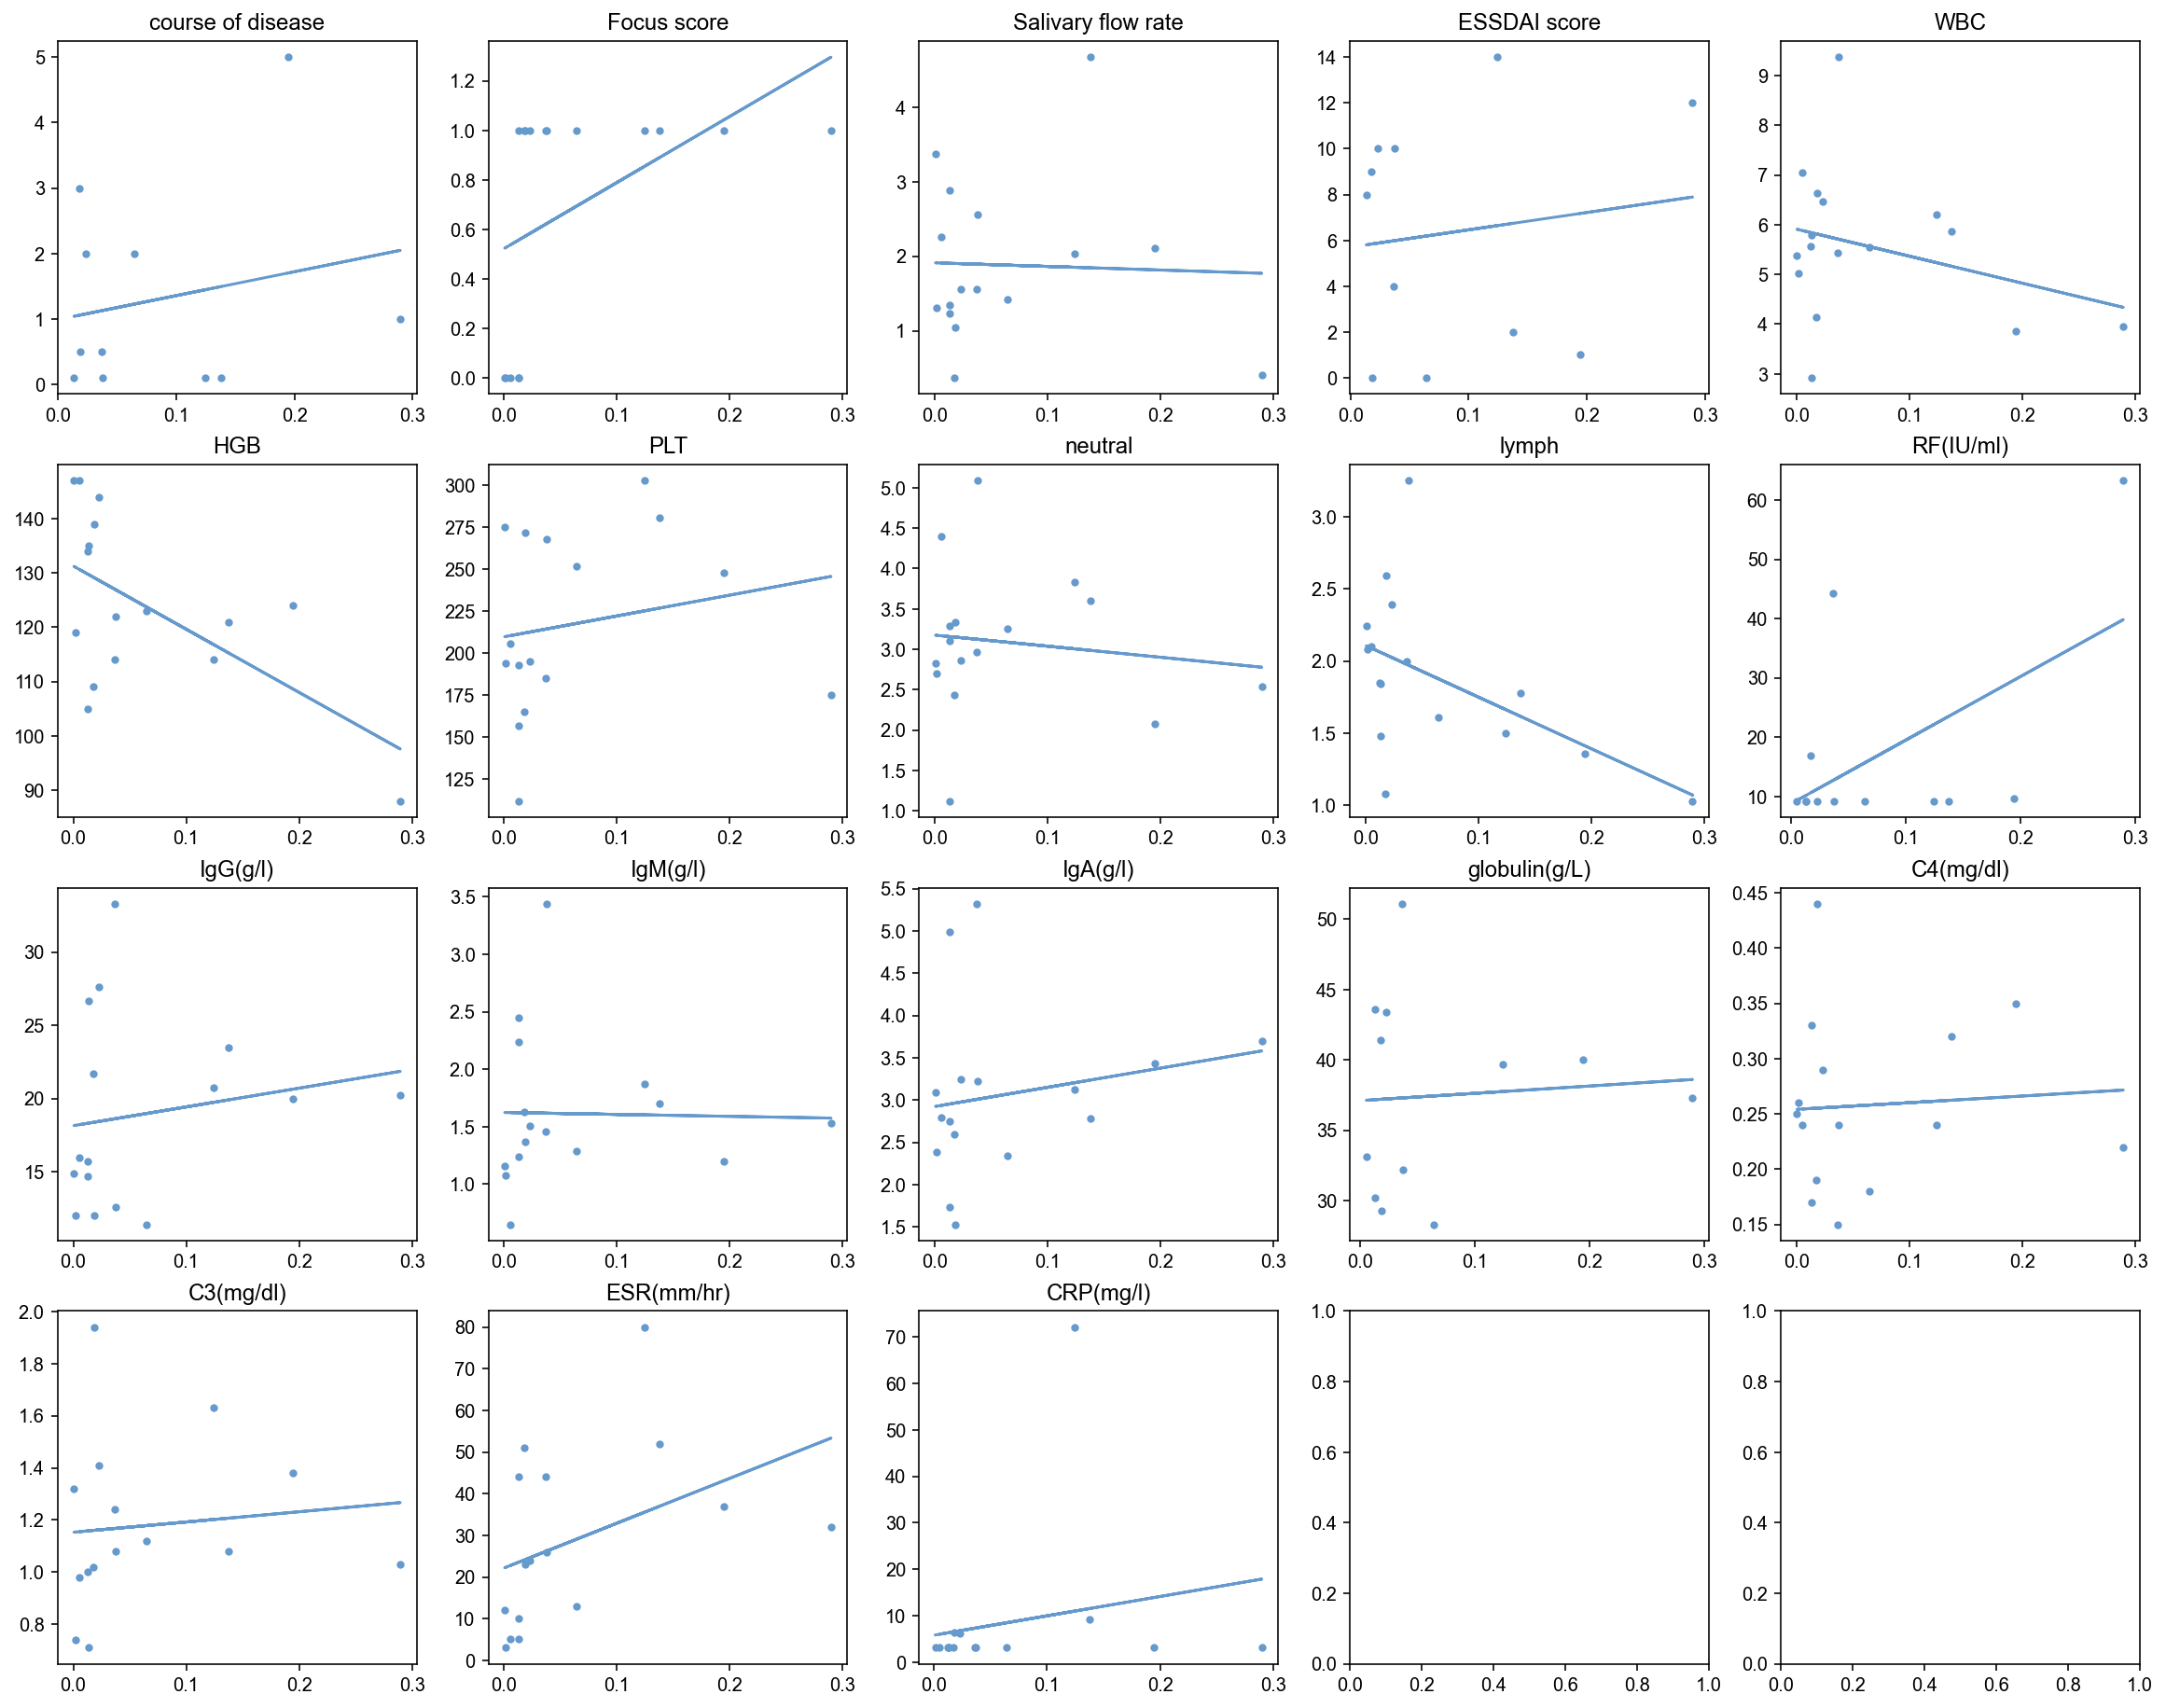

In [18]:
### Cell ratio and clinical info
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
axes = axes.flatten()
_list=[]
for i, gene in enumerate(types):
    plot_df1=ratio_df['B']
    plot_df2=meta_df[gene]
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([gene,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(gene)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
#plt.savefig('/home/caipengfei/RNA_seq/nCov/virus/Beijing/Cell_revised/figures/ratio_plasma_correlation/CytokineGenes_serum_Mono-C1_ratio_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
#sta_df.columns=['gene','pval','rsquared']
sta_df.columns=['gene','pval','correlation']
#sta_df.to_csv('/home/caipengfei/RNA_seq/nCov/virus/Beijing/Cell_revised/figures/ratio_plasma_correlation/CytokineGenes_serum_Mono-C1_ratio_correlation.csv',index=None)
#sta_df.to_csv('/home/caipengfei/RNA_seq/nCov/virus/Beijing/Cell_revised/figures/ratio_plasma_correlation/spearman/CytokineGenes_serum_Mono-C1_ratio_correlation.csv',index=None)
#

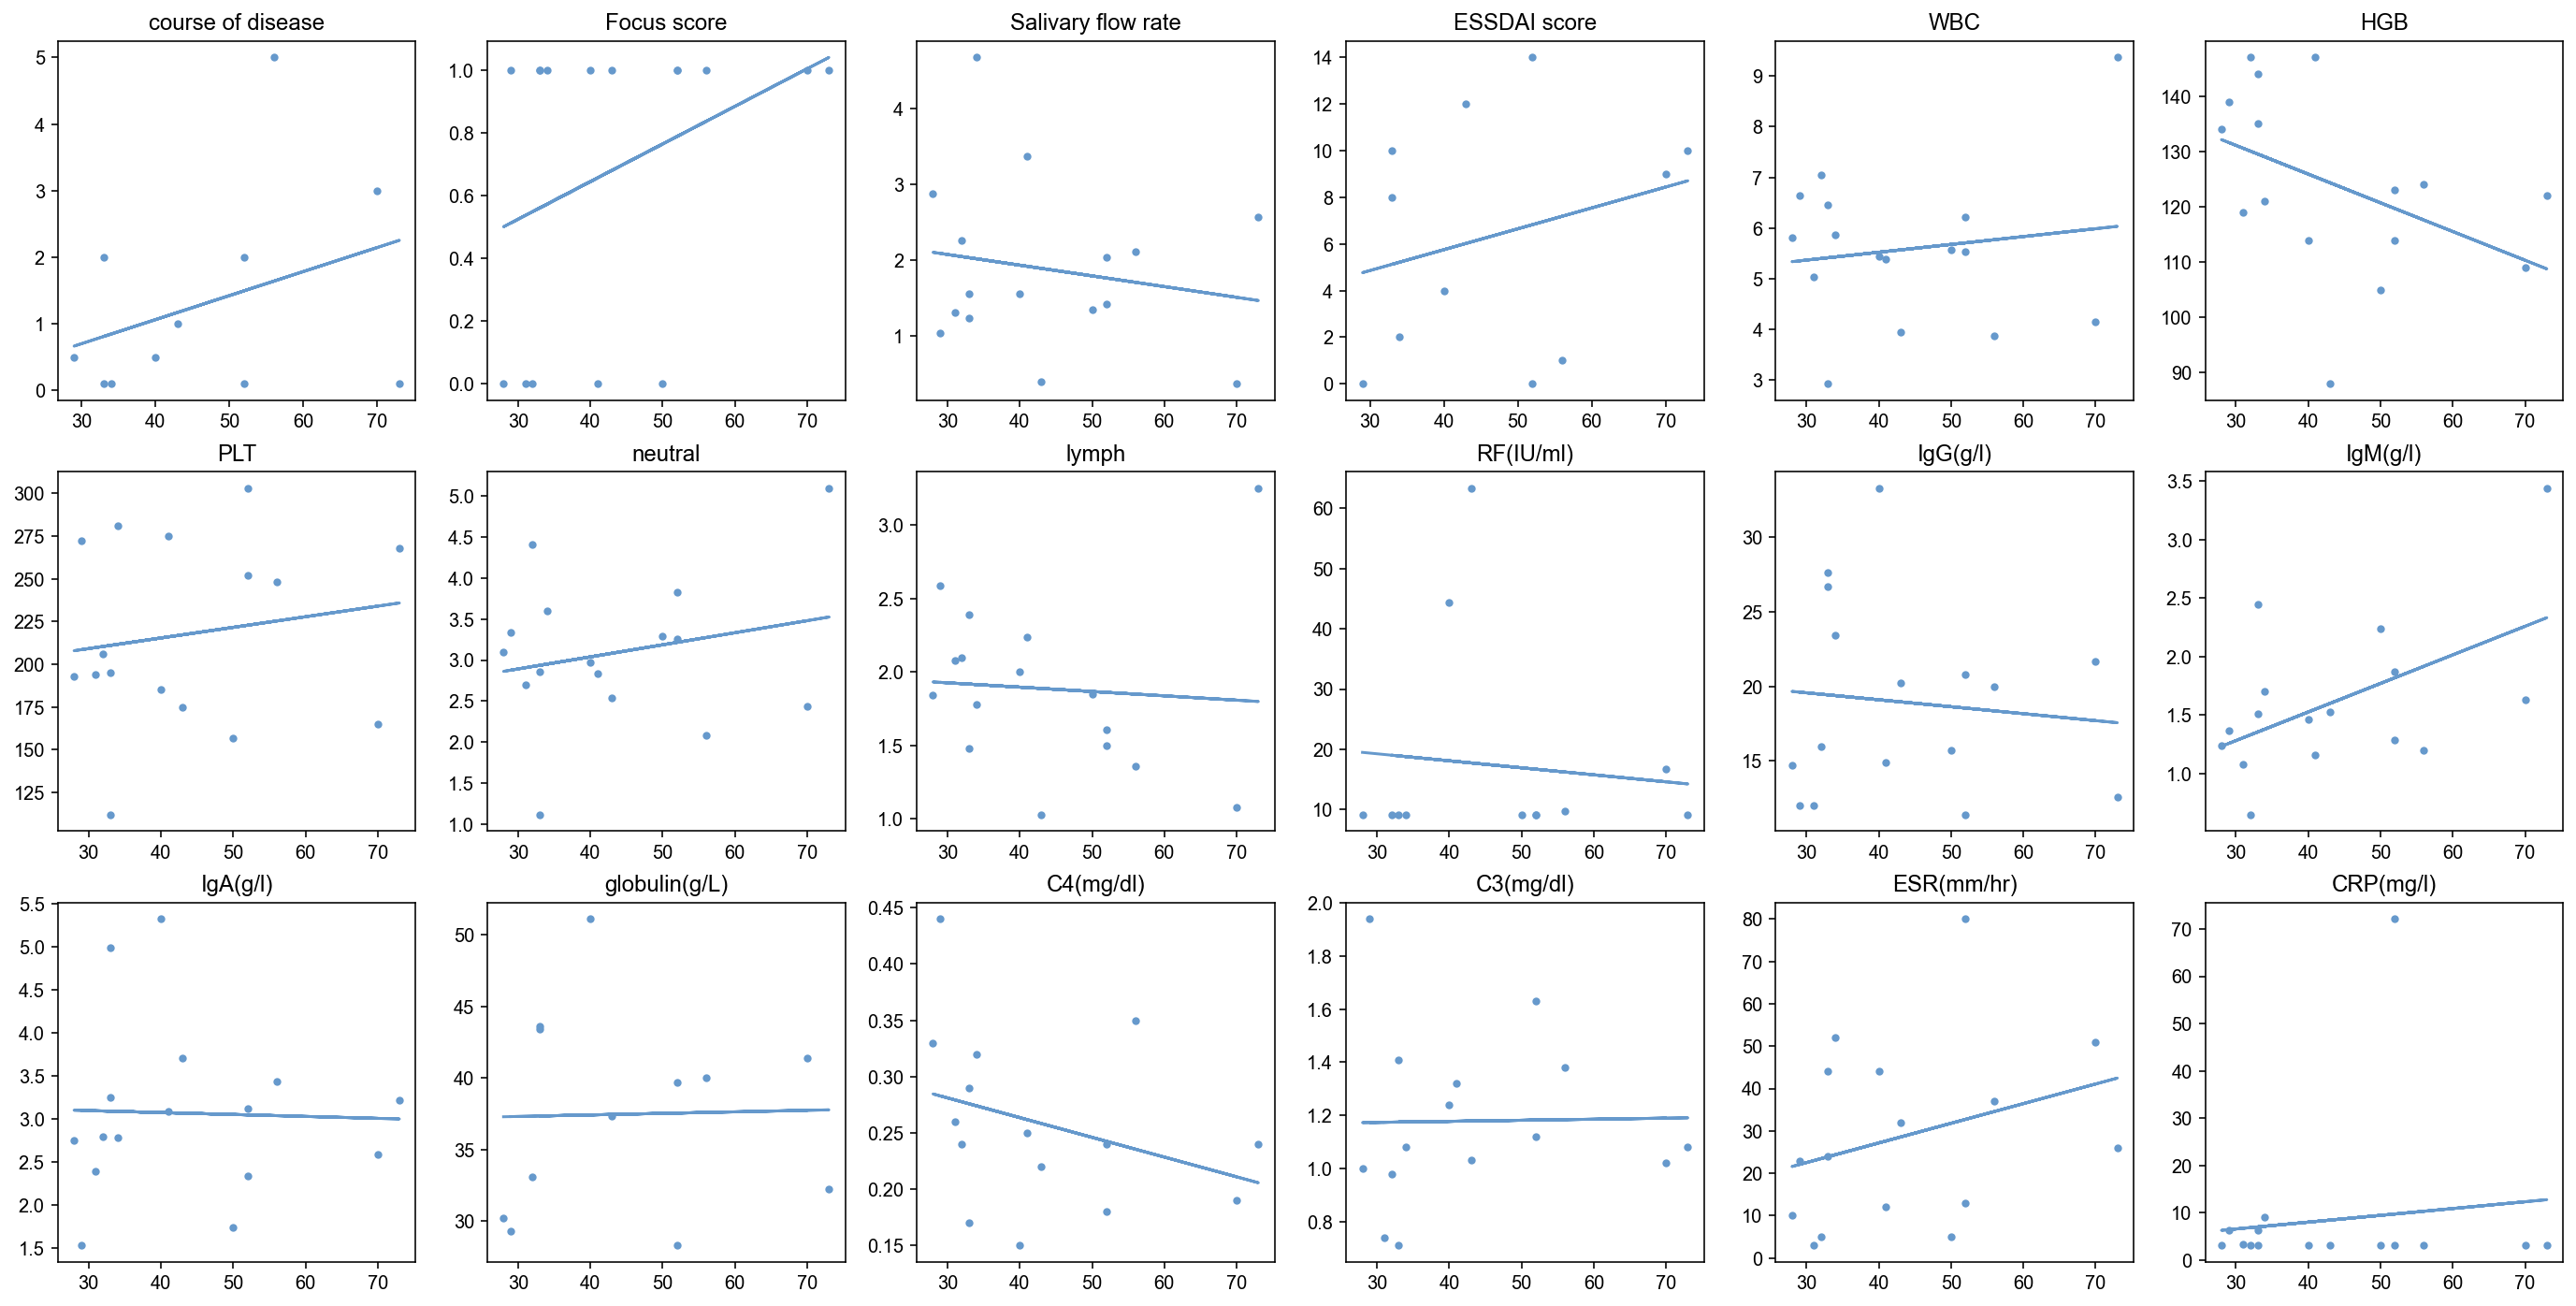

In [34]:
### Age and clinical info
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, gene in enumerate(types):
    plot_df1=meta_df['age']
    plot_df2=meta_df[gene]
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([gene,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(gene)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/Age_ClinicalInfo_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['clinical','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/Age_ClinicalInfo_correlation.csv',index=None)
#

/home/caipengfei/miniconda3/envs/multiclustering/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


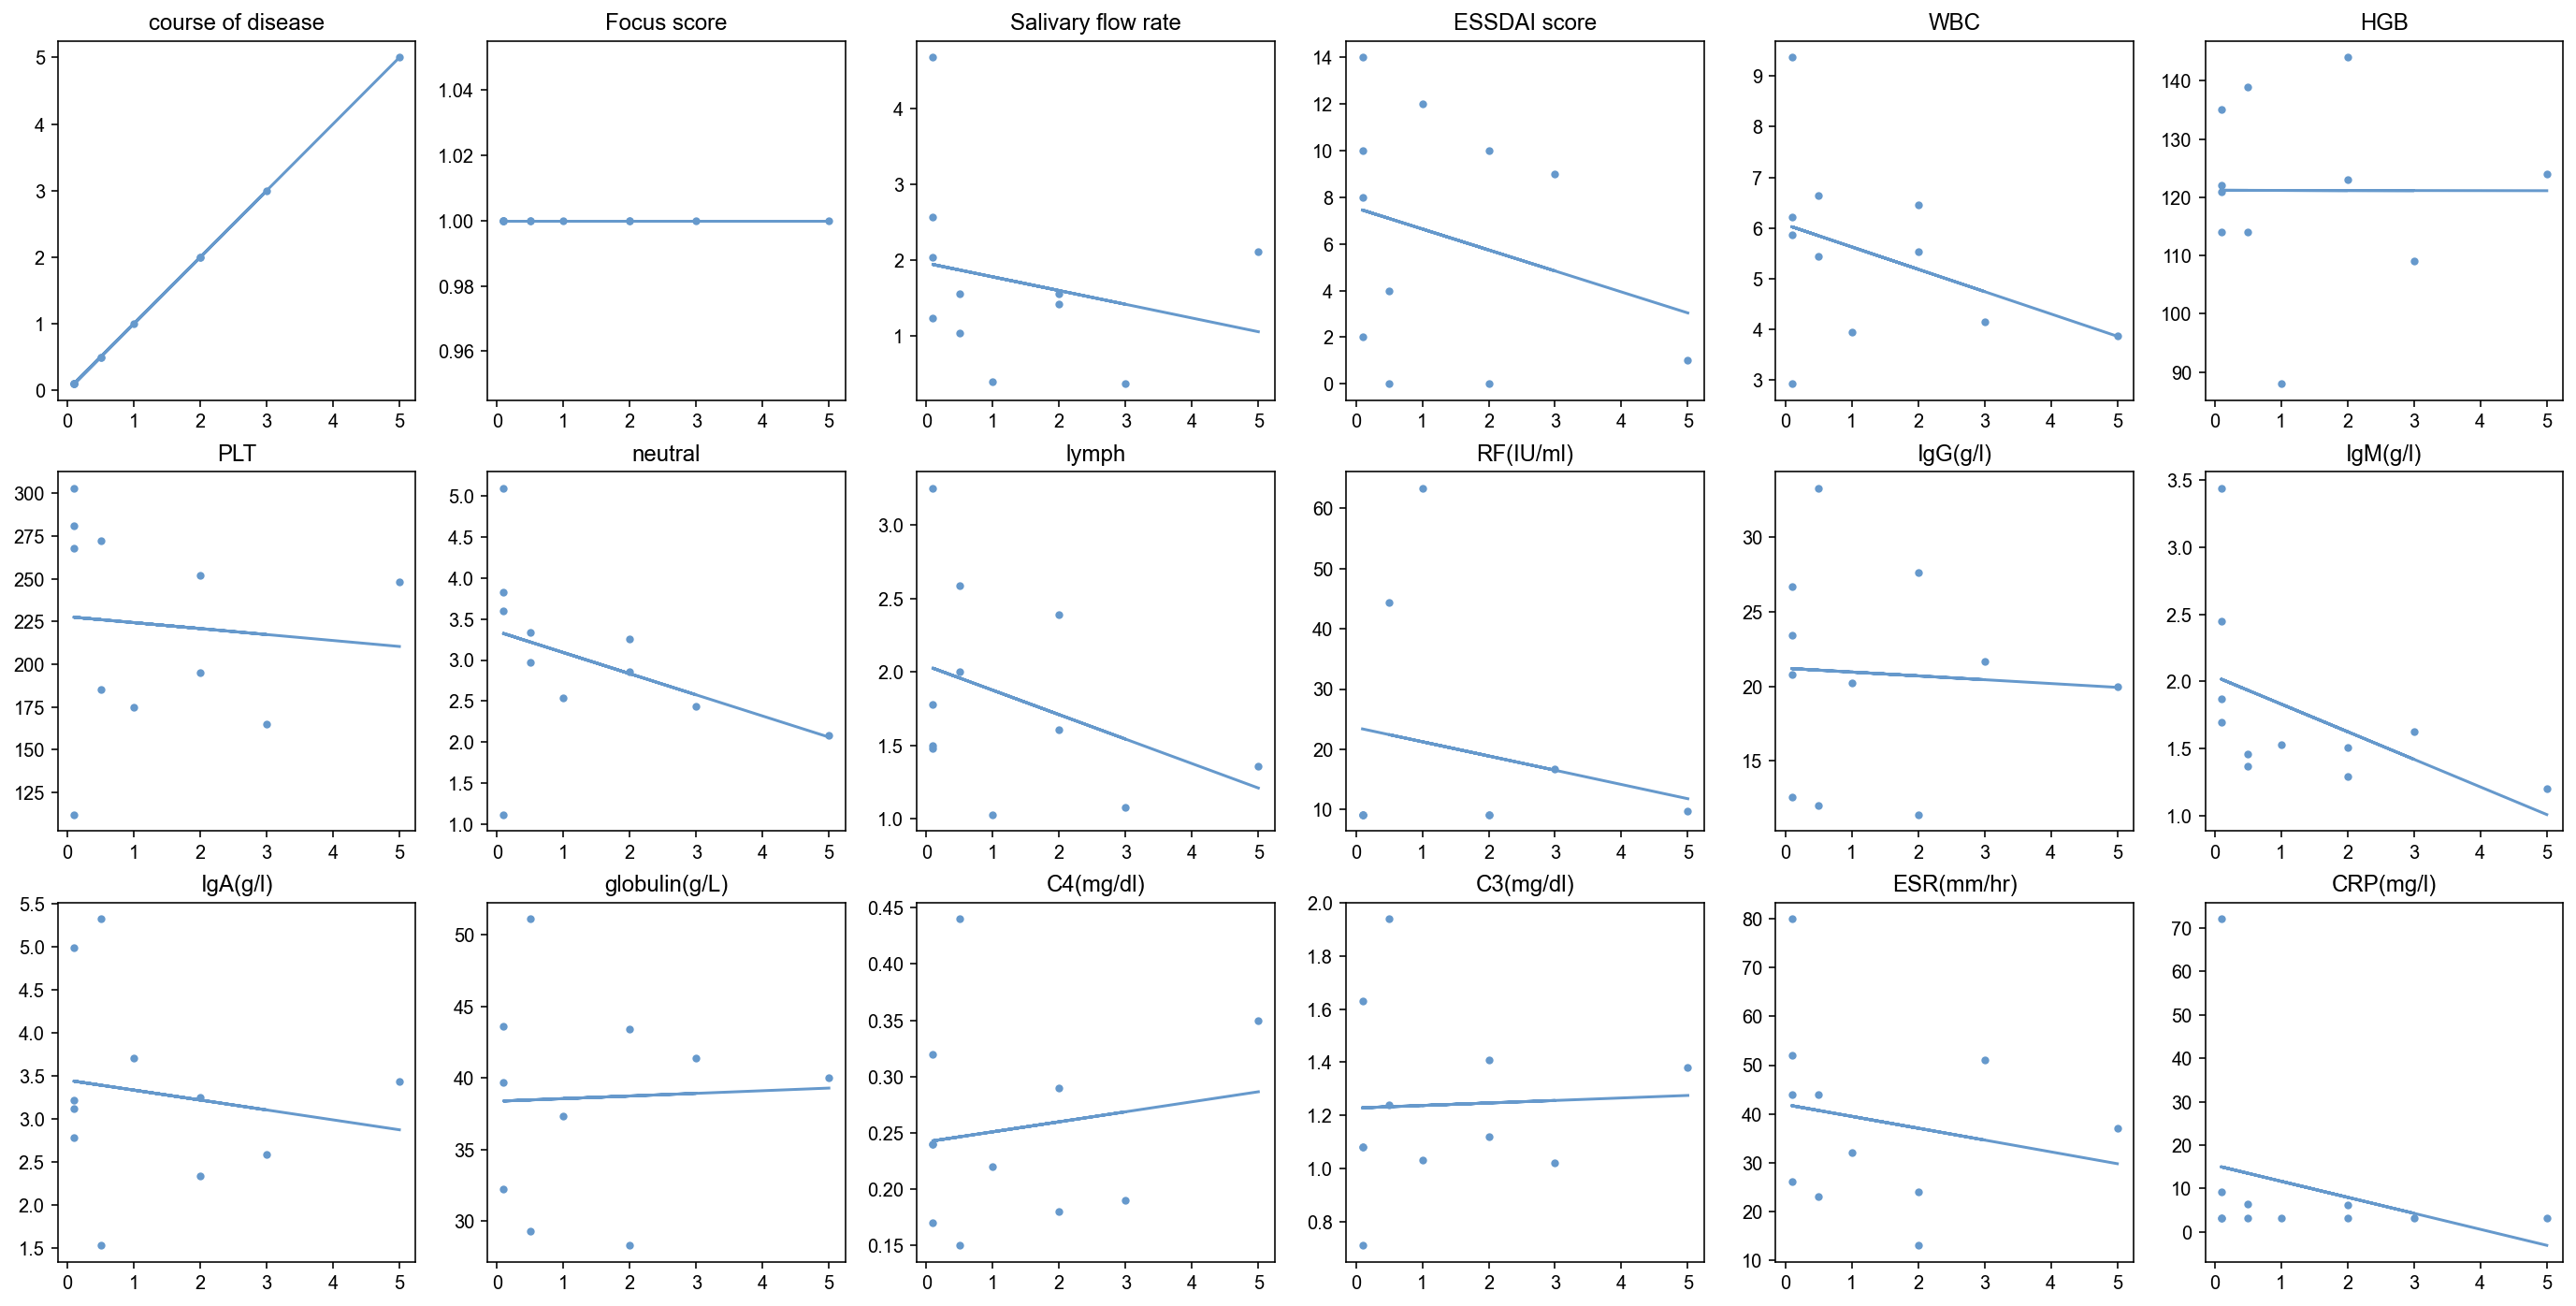

In [35]:
### Disease progression and clinical info
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, gene in enumerate(types):
    plot_df1=meta_df['course of disease']
    plot_df2=meta_df[gene]
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([gene,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(gene)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/DiseaseProgression_ClinicalInfo_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['clinical','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/DiseaseProgression_ClinicalInfo_correlation.csv',index=None)
#

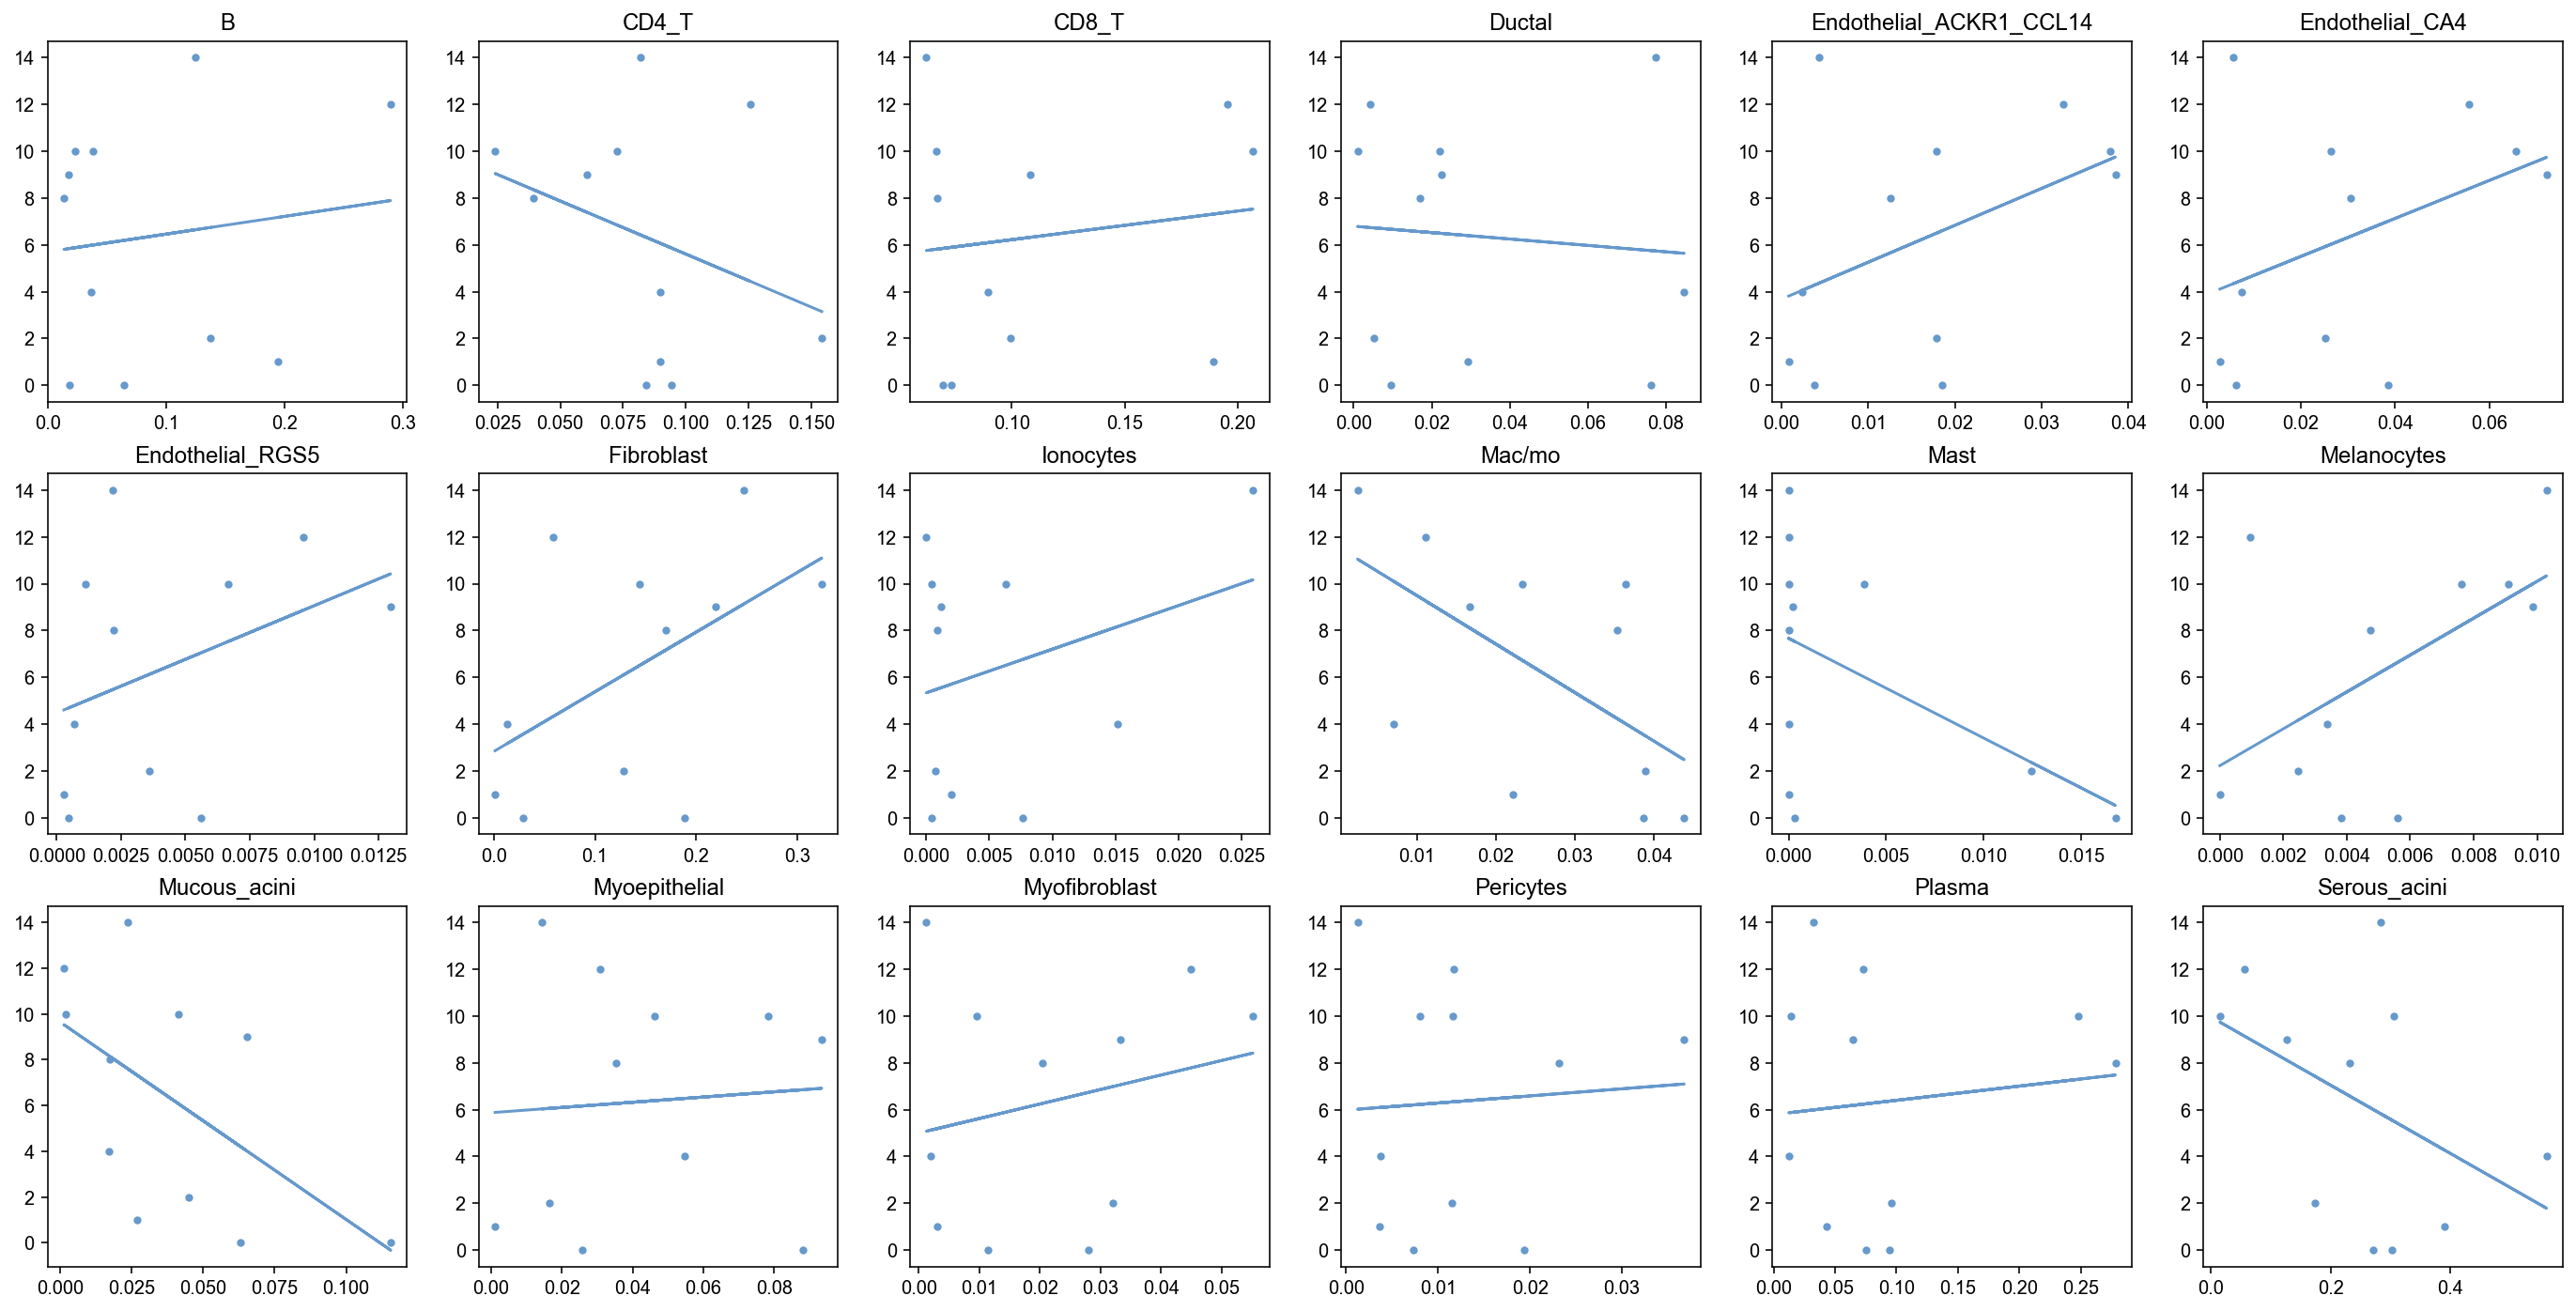

In [31]:
### ESSDAI score
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, cell in enumerate(cell_types):
    plot_df1=ratio_df[cell]
    plot_df2=meta_df['ESSDAI score']
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([cell,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(cell)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/CellRatio_ESSDAI_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['celltype','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/CellRatio_ESSDAI_correlation.csv',index=None)
#

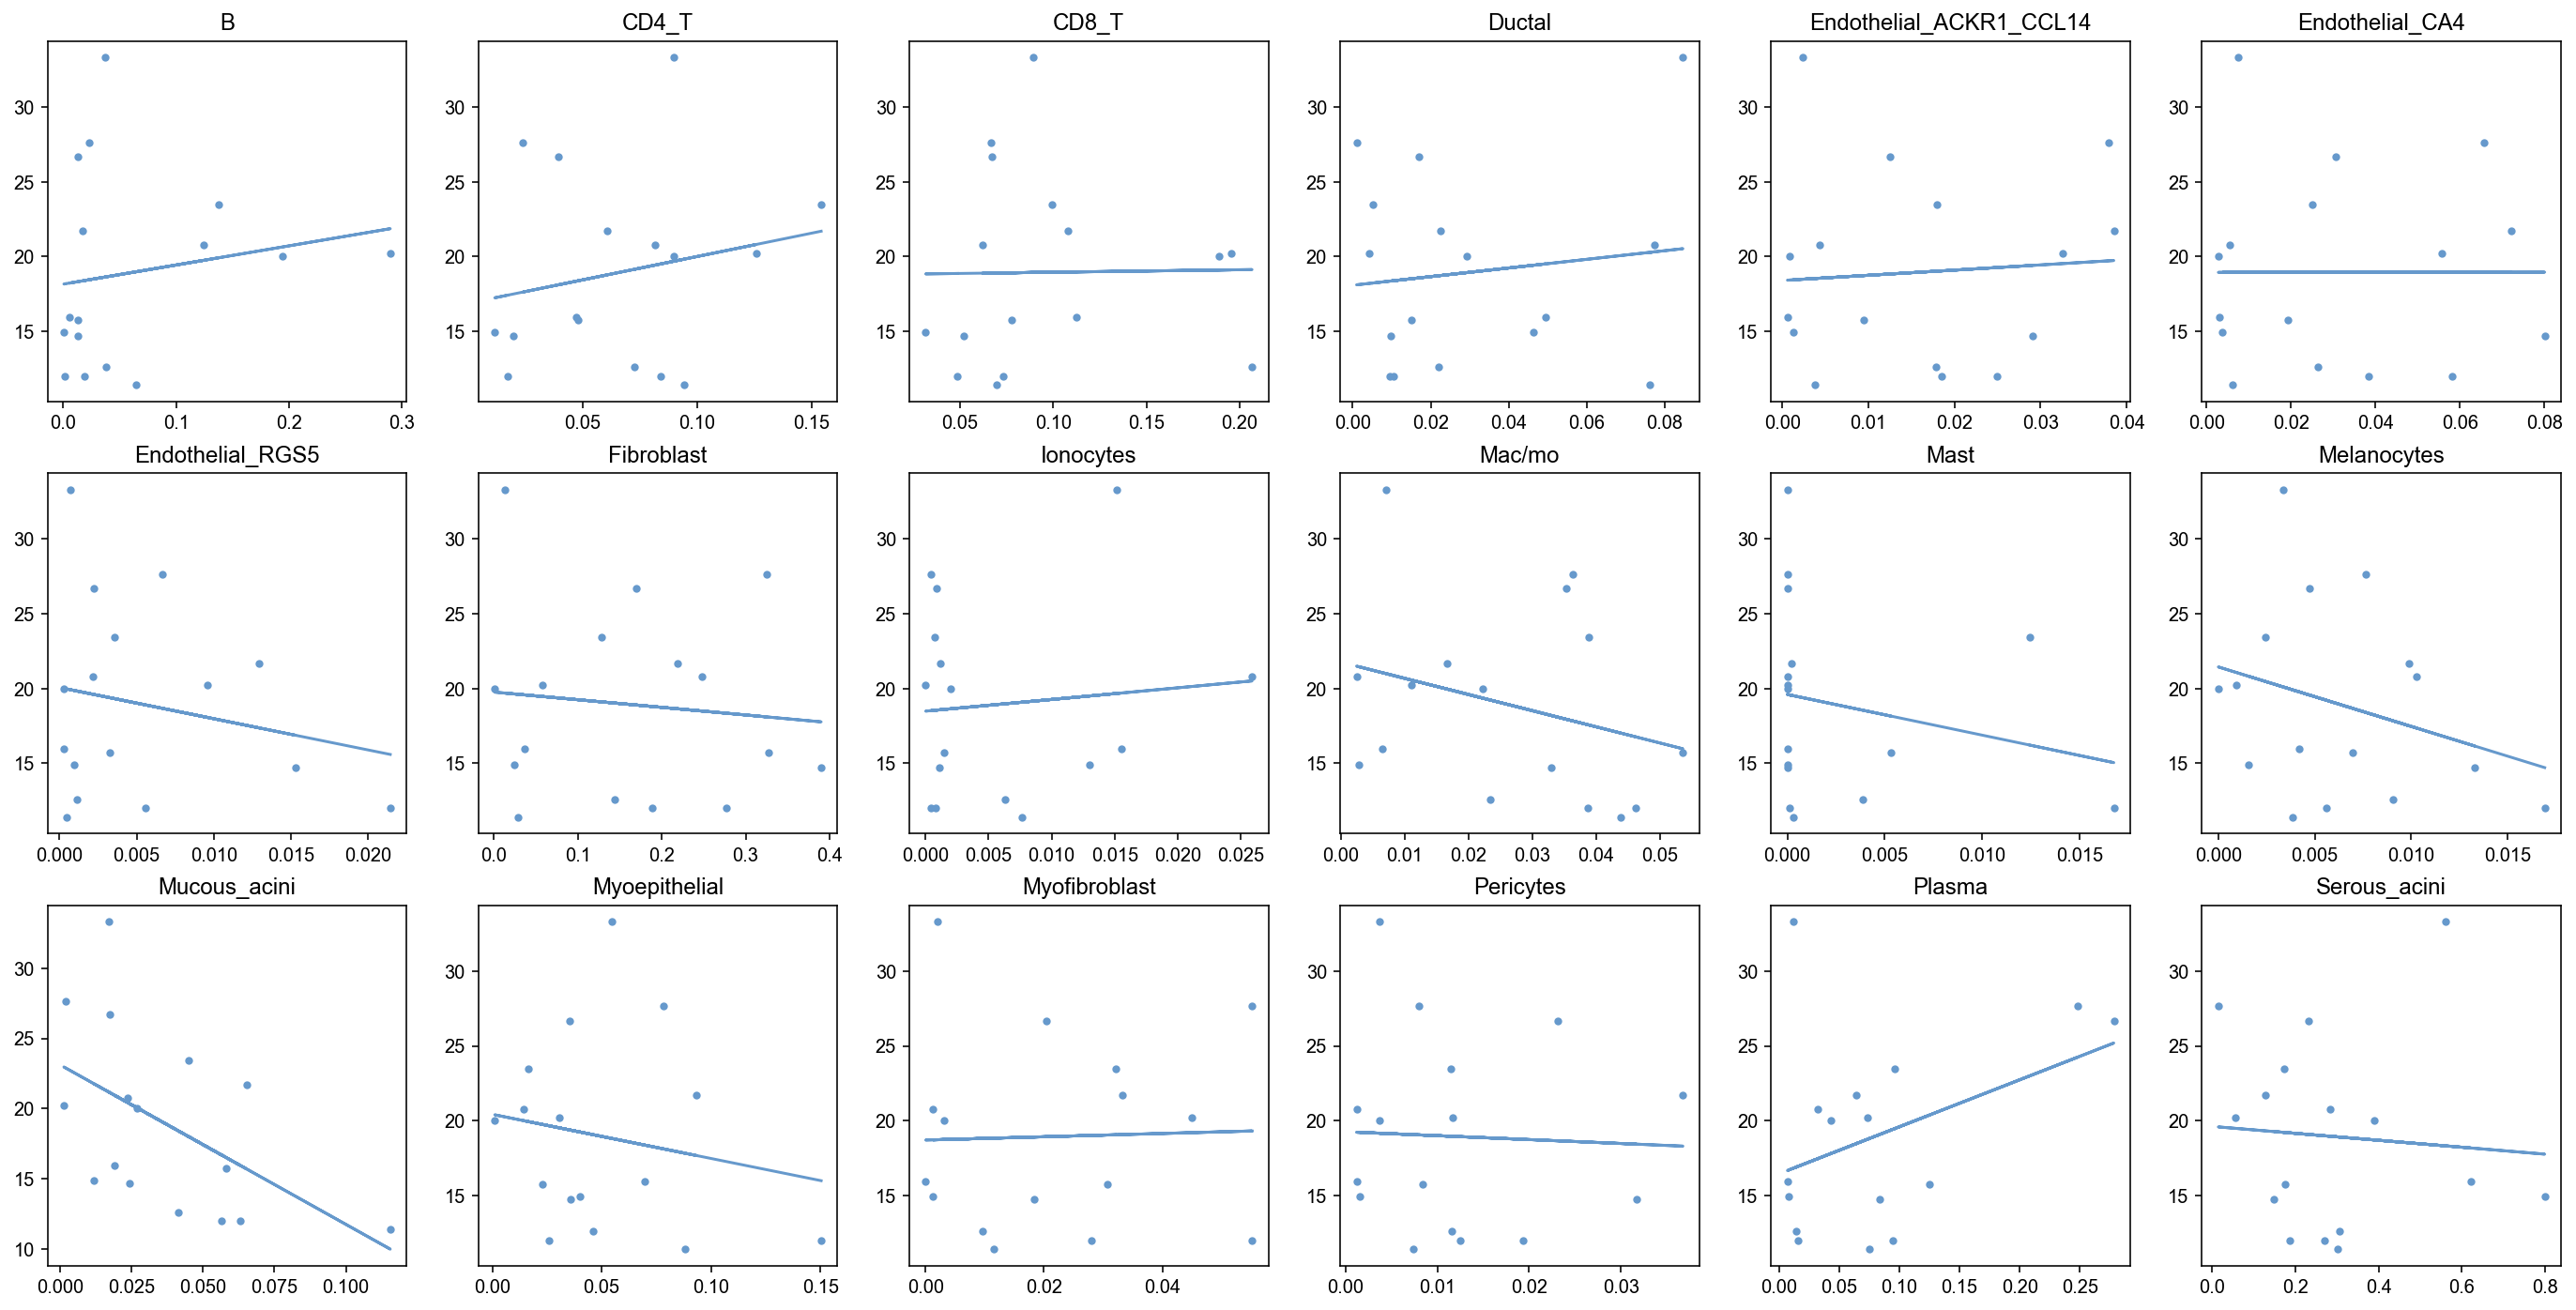

In [32]:
### IgG(g/l)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, cell in enumerate(cell_types):
    plot_df1=ratio_df[cell]
    plot_df2=meta_df['IgG(g/l)']
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([cell,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(cell)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/CellRatio_IgG_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['celltype','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/CellRatio_IgG_correlation.csv',index=None)
#

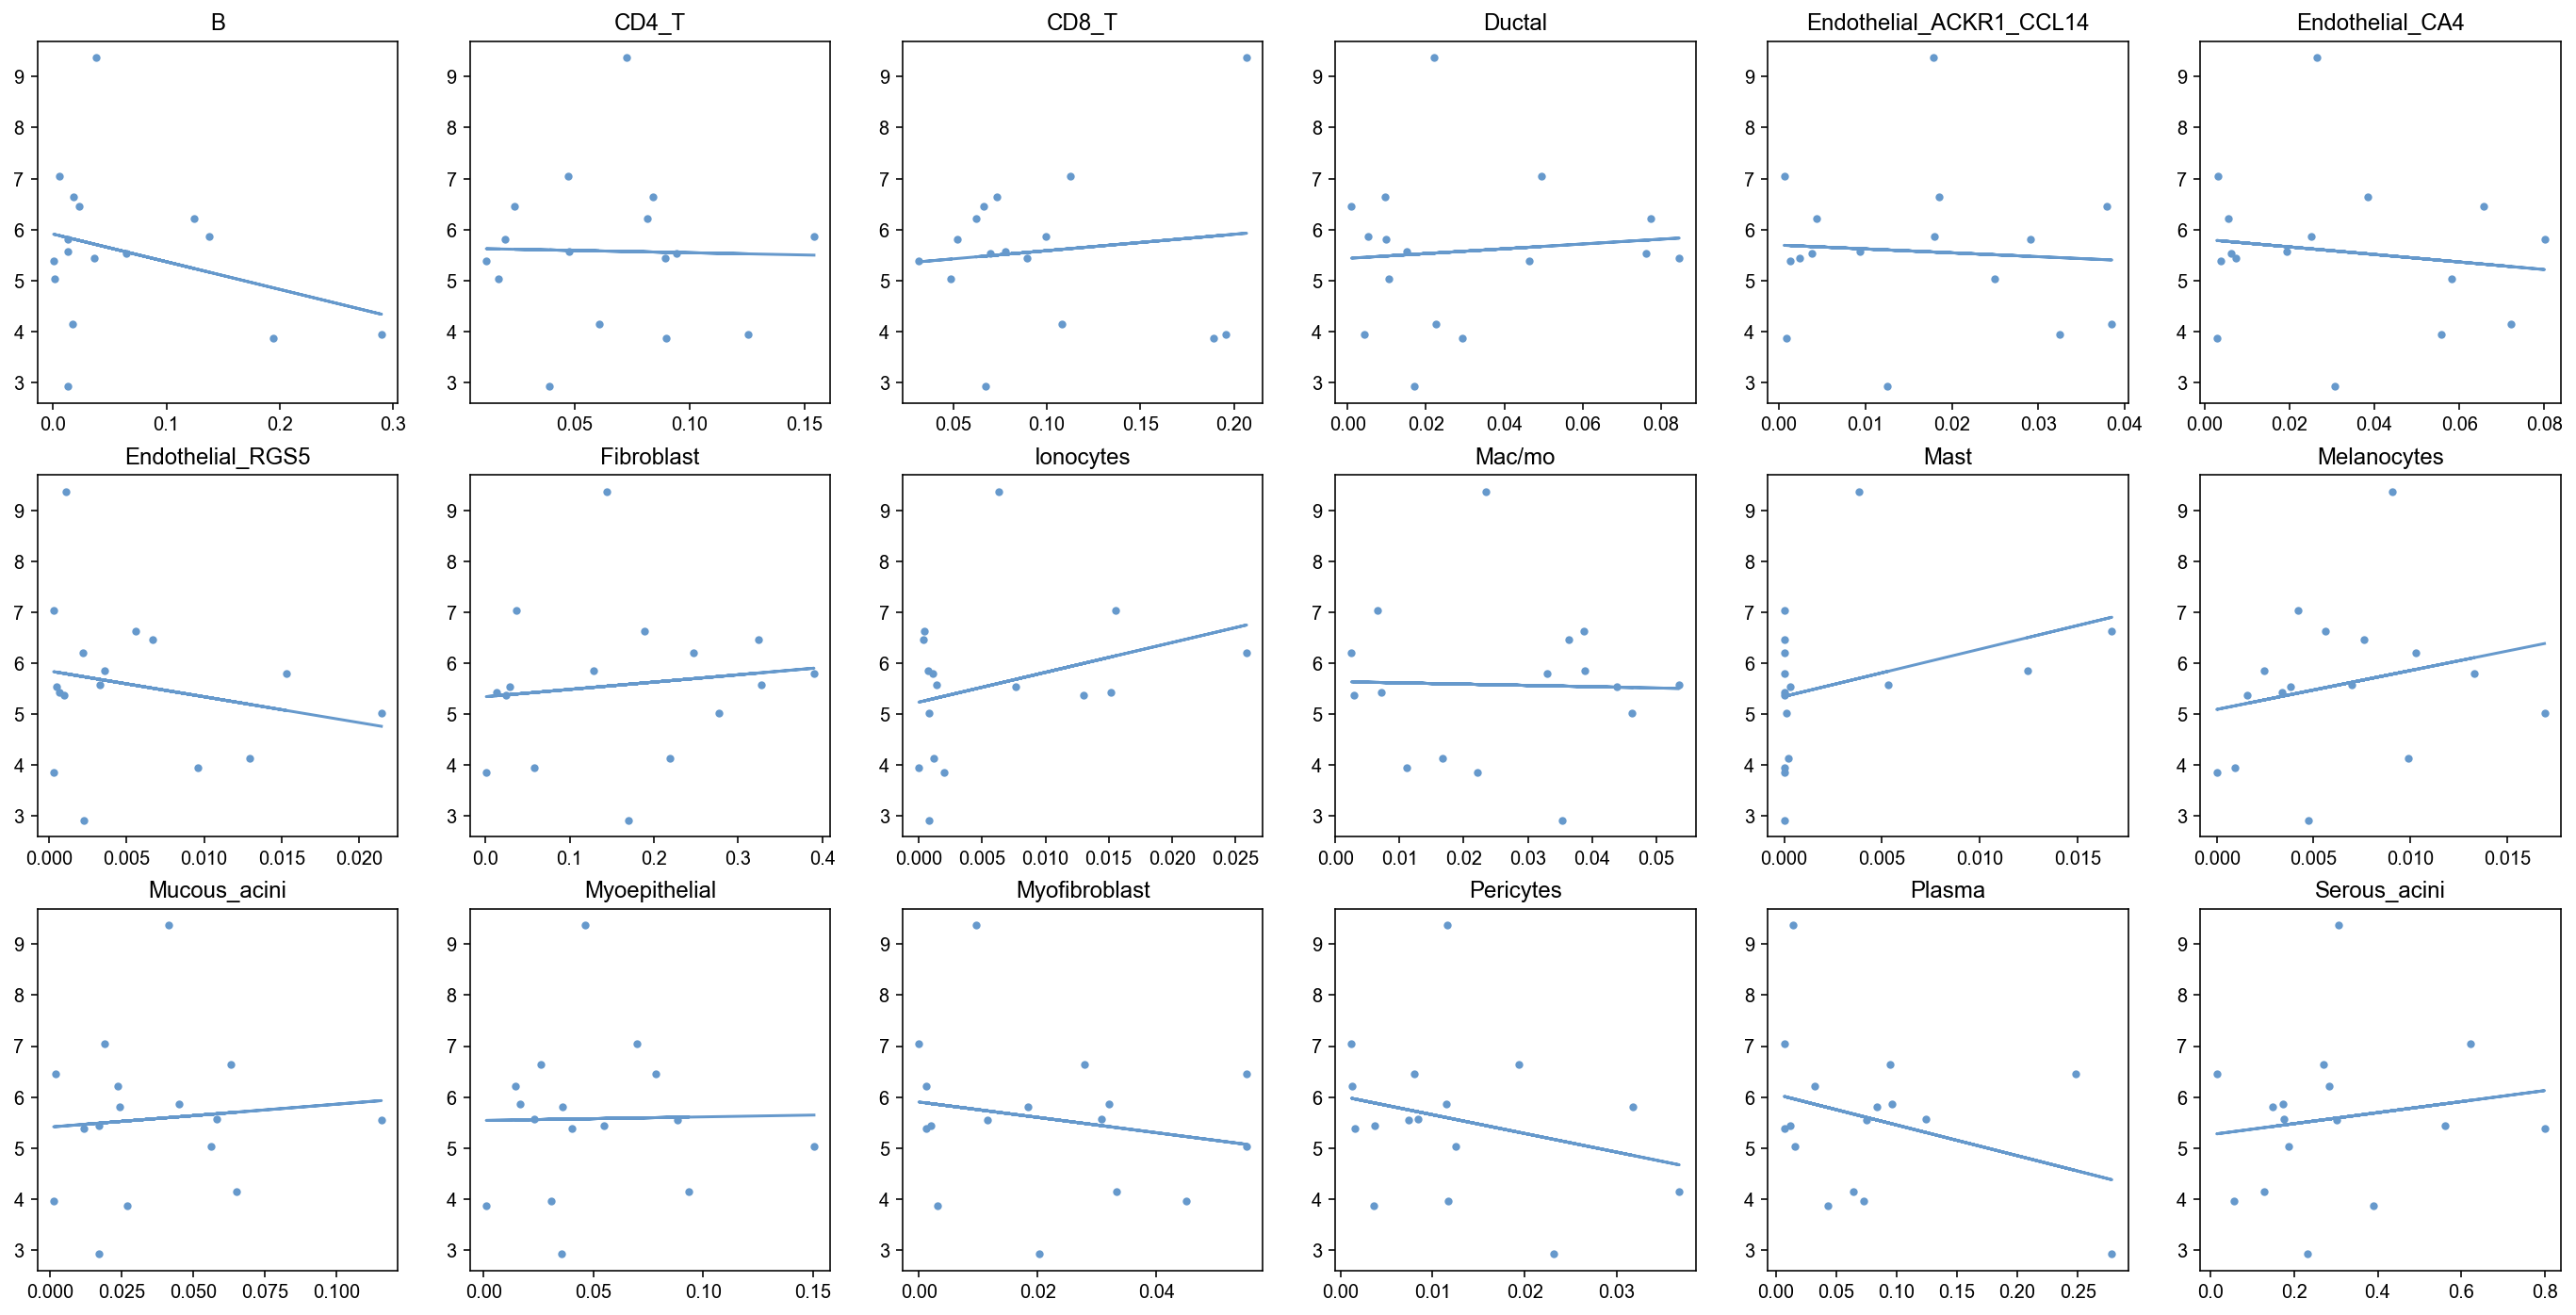

In [9]:
### WBC
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, cell in enumerate(cell_types):
    plot_df1=ratio_df[cell]
    plot_df2=meta_df['WBC']
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([cell,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(cell)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/CellRatio_WBC_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['celltype','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/CellRatio_WBC_correlation.csv',index=None)
#

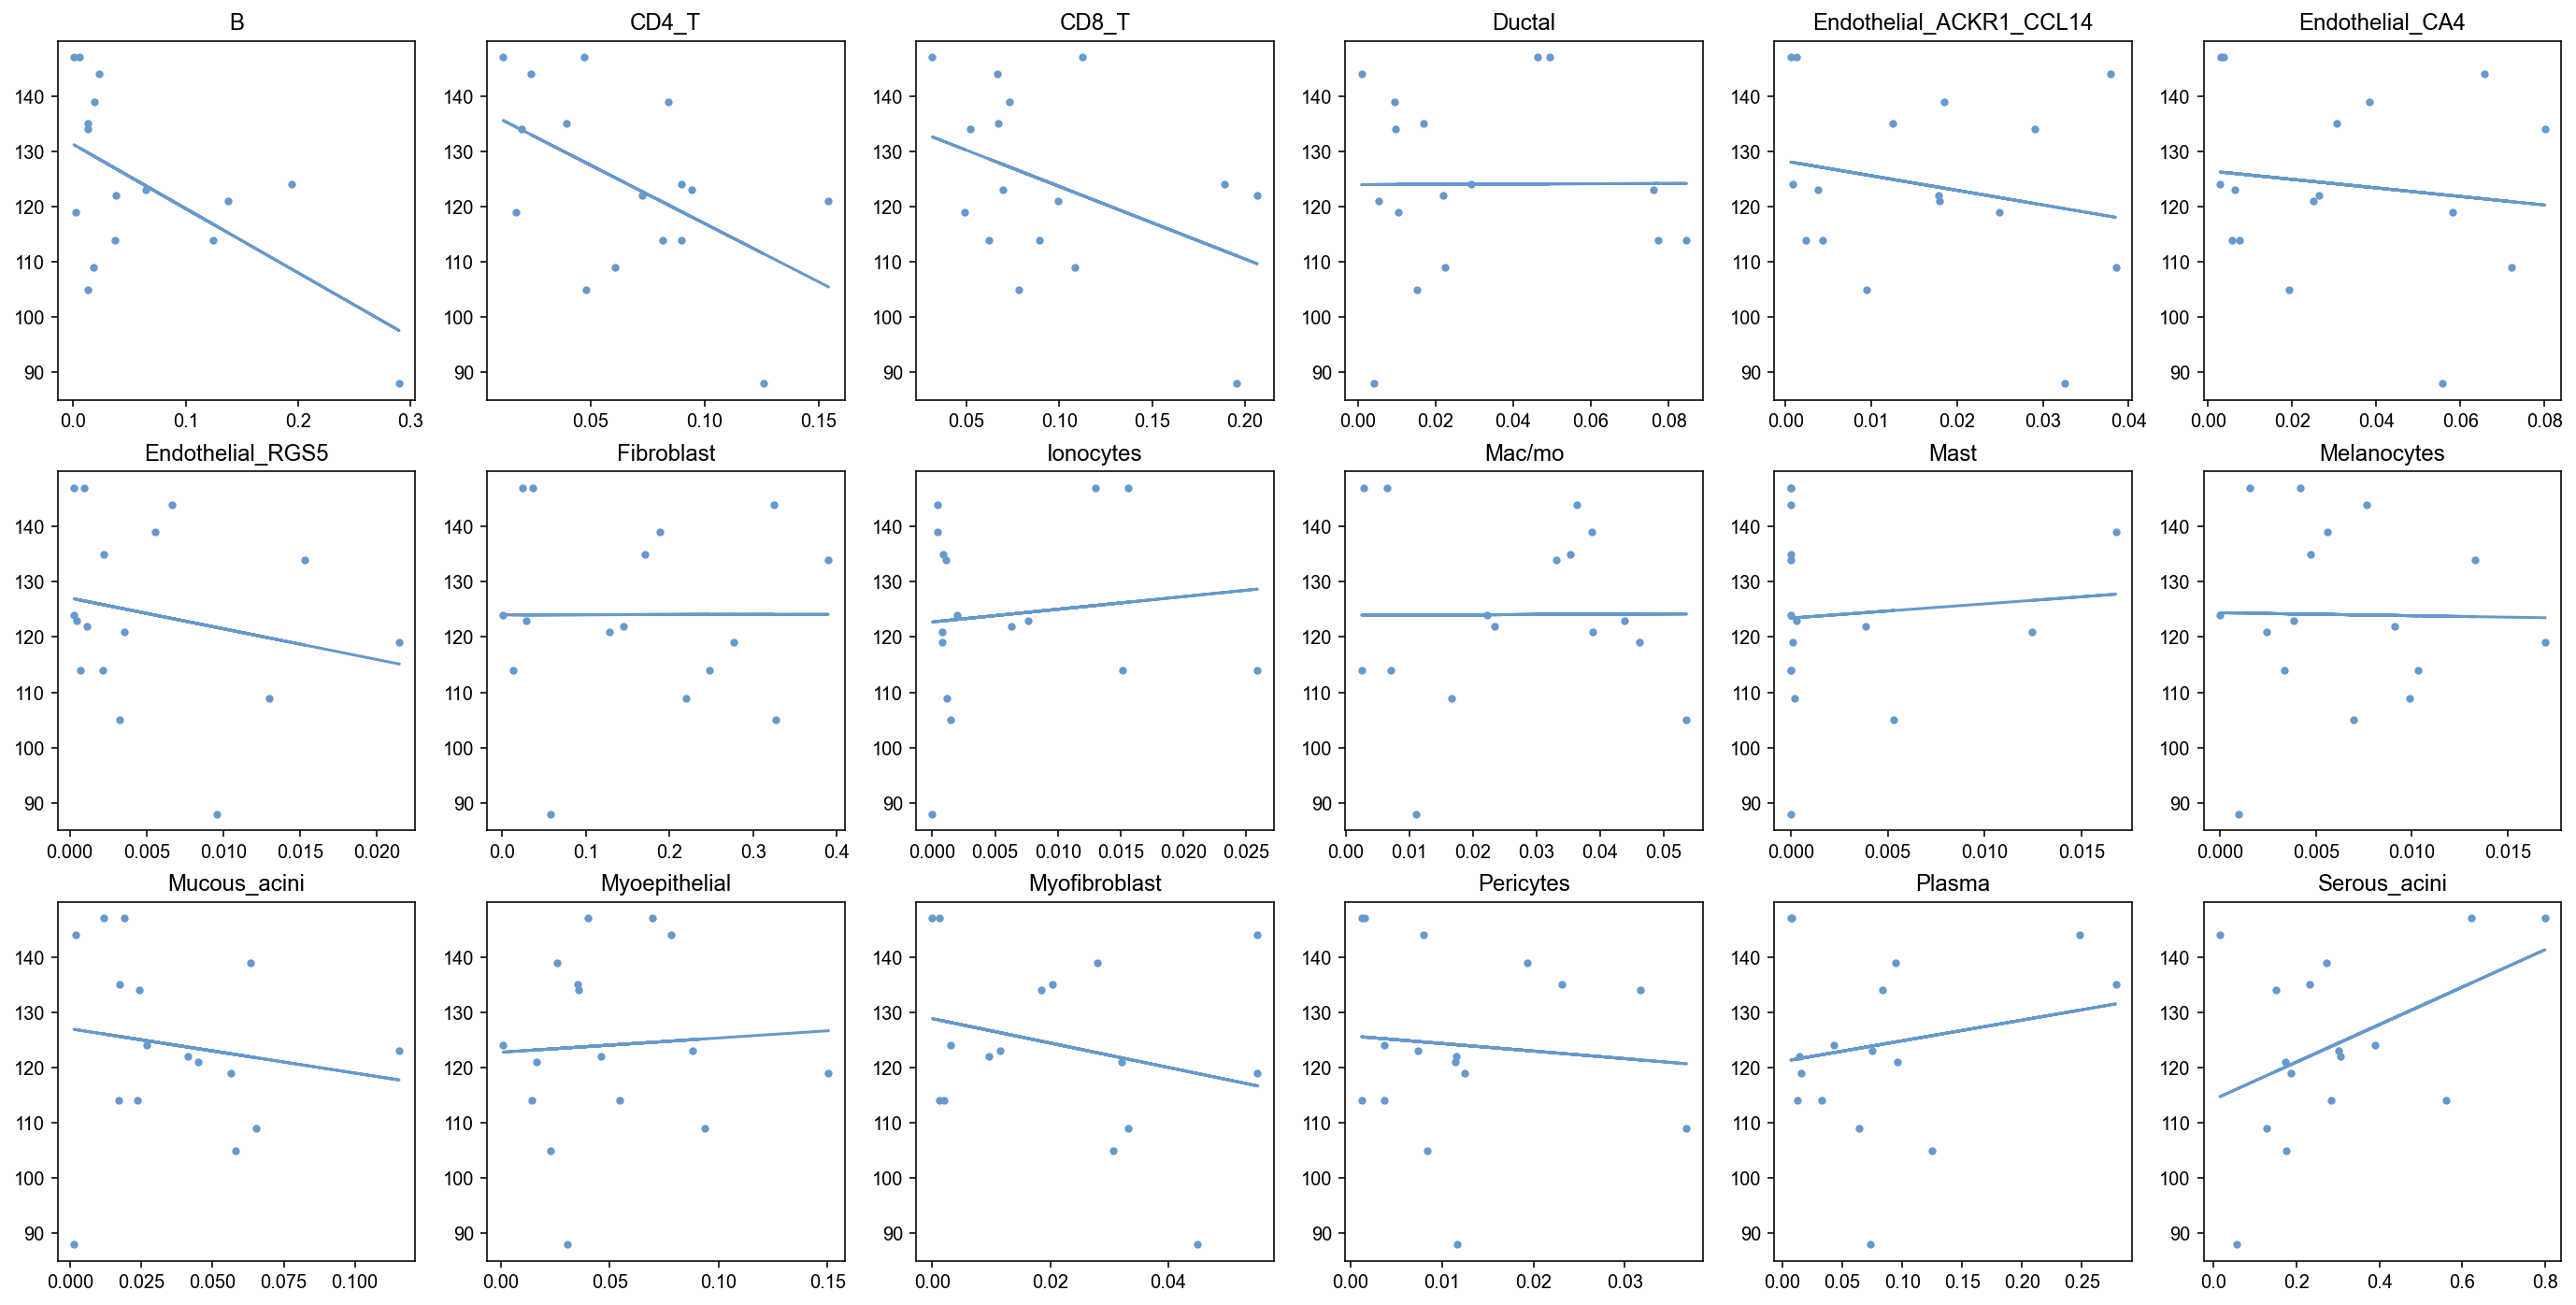

In [16]:
### HGB
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, cell in enumerate(cell_types):
    plot_df1=ratio_df[cell]
    plot_df2=meta_df['HGB']
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([cell,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(cell)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/CellRatio_HGB_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['celltype','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/CellRatio_HGB_correlation.csv',index=None)
#

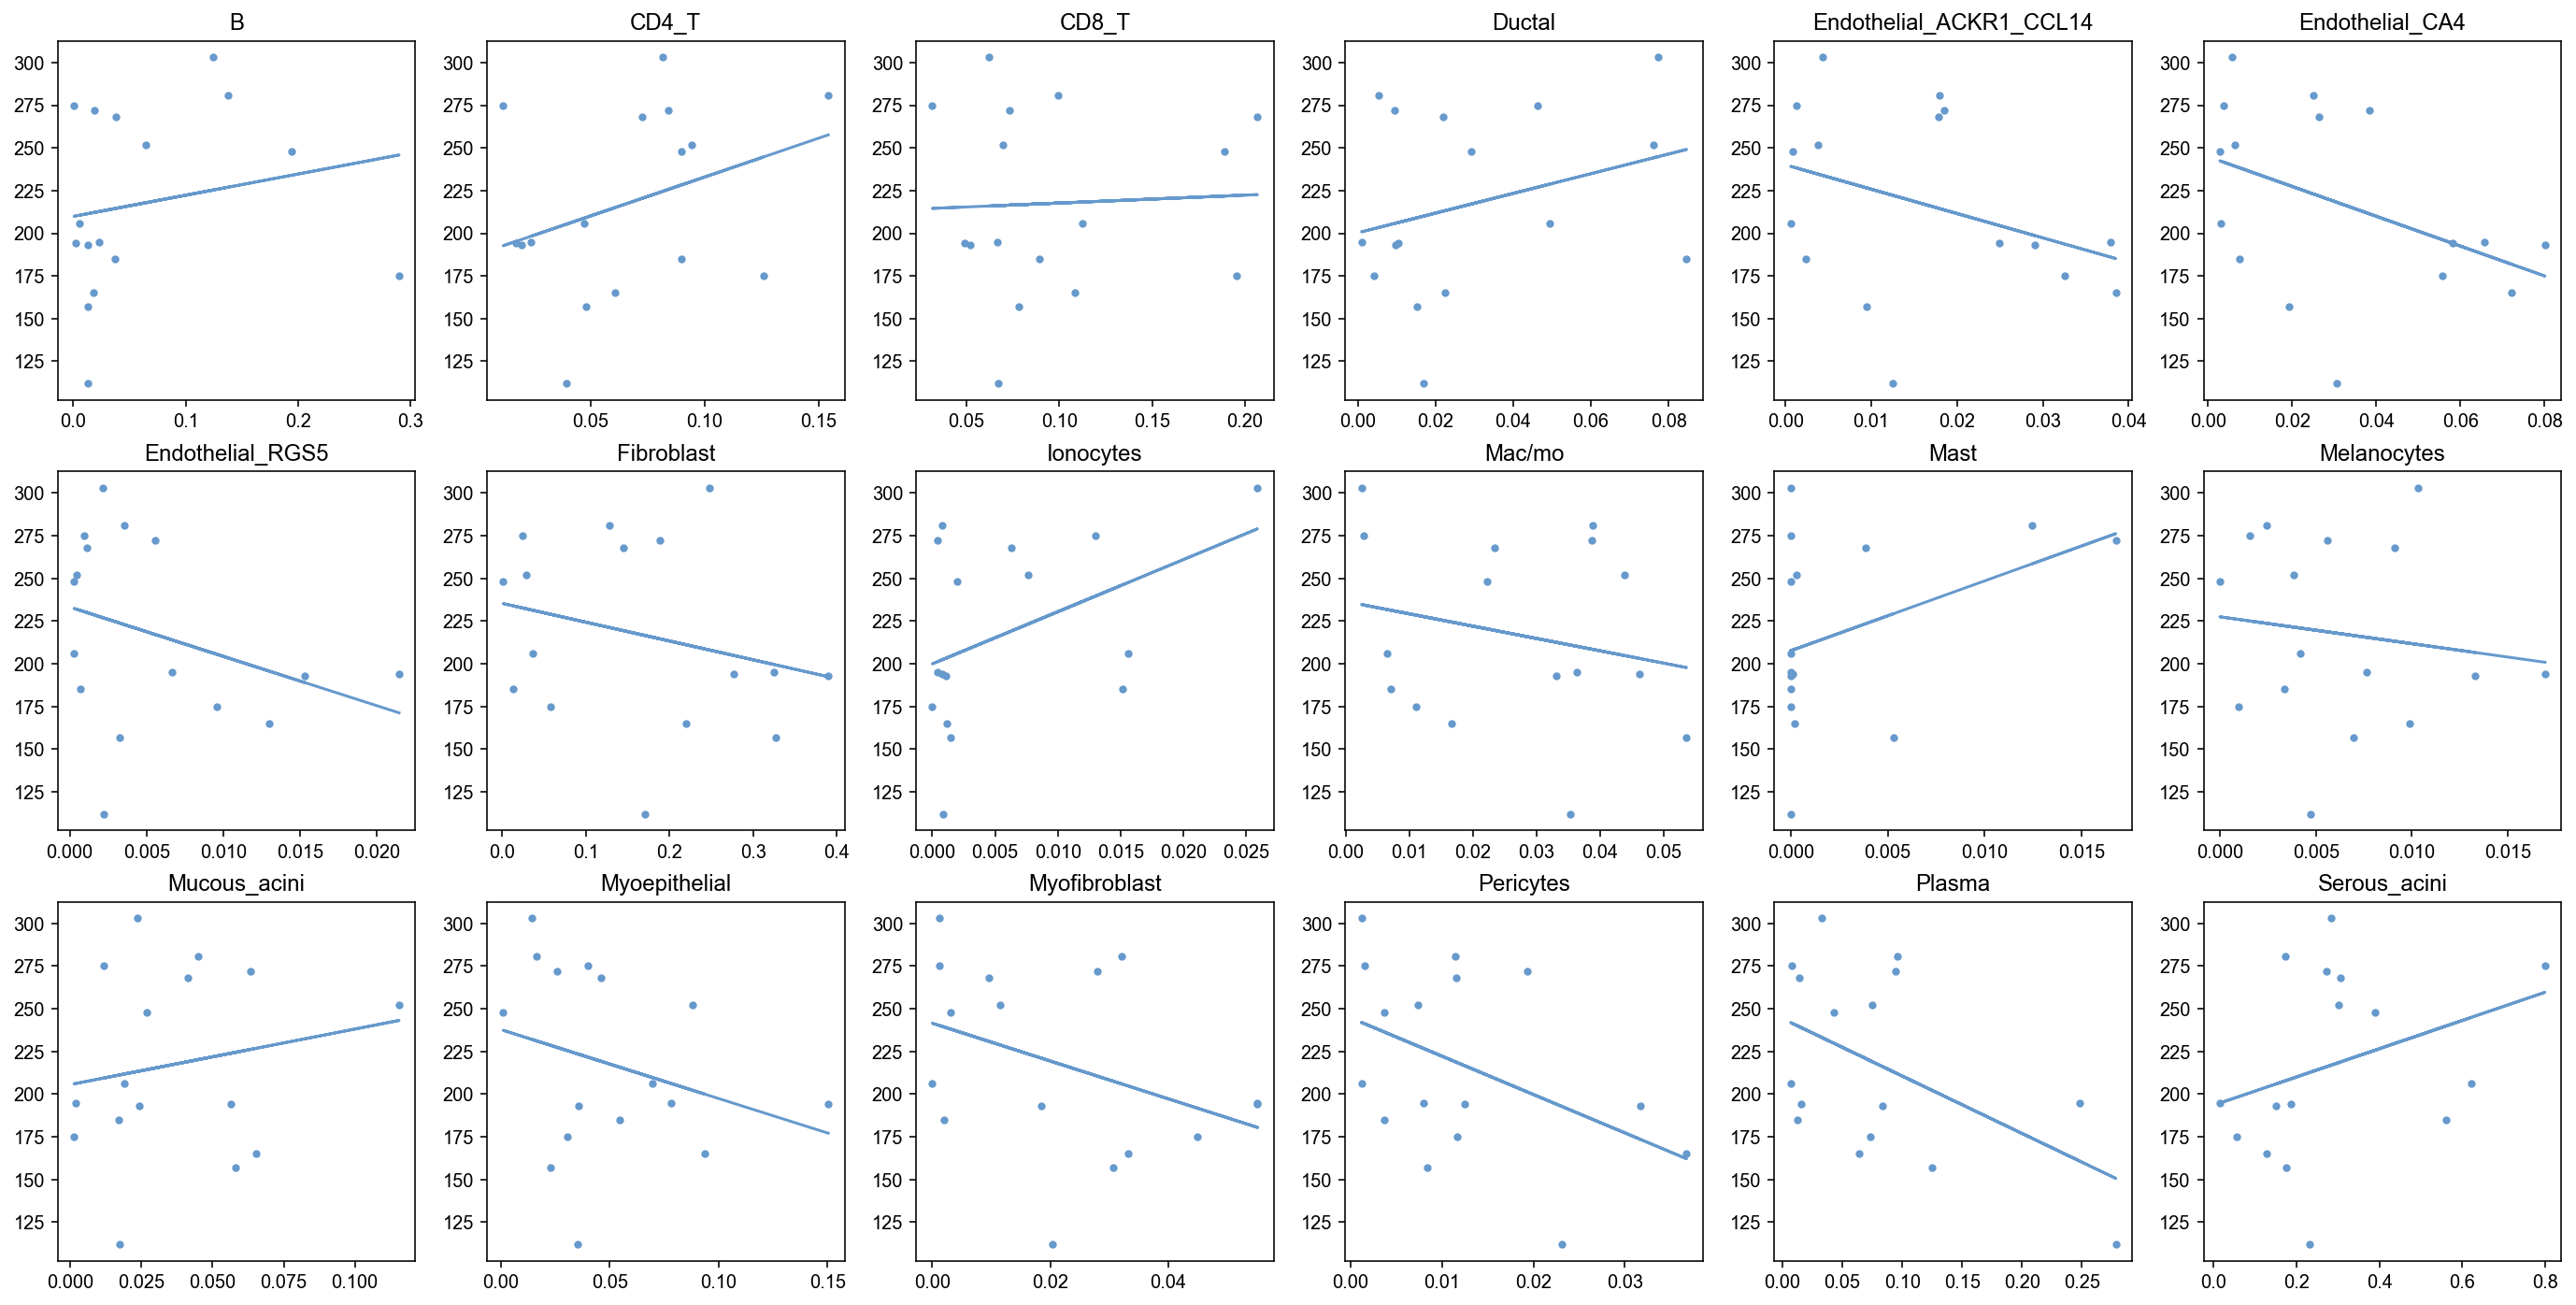

In [17]:
### PLT
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, cell in enumerate(cell_types):
    plot_df1=ratio_df[cell]
    plot_df2=meta_df['PLT']
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([cell,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(cell)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/CellRatio_PLT_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['celltype','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/CellRatio_PLT_correlation.csv',index=None)
#

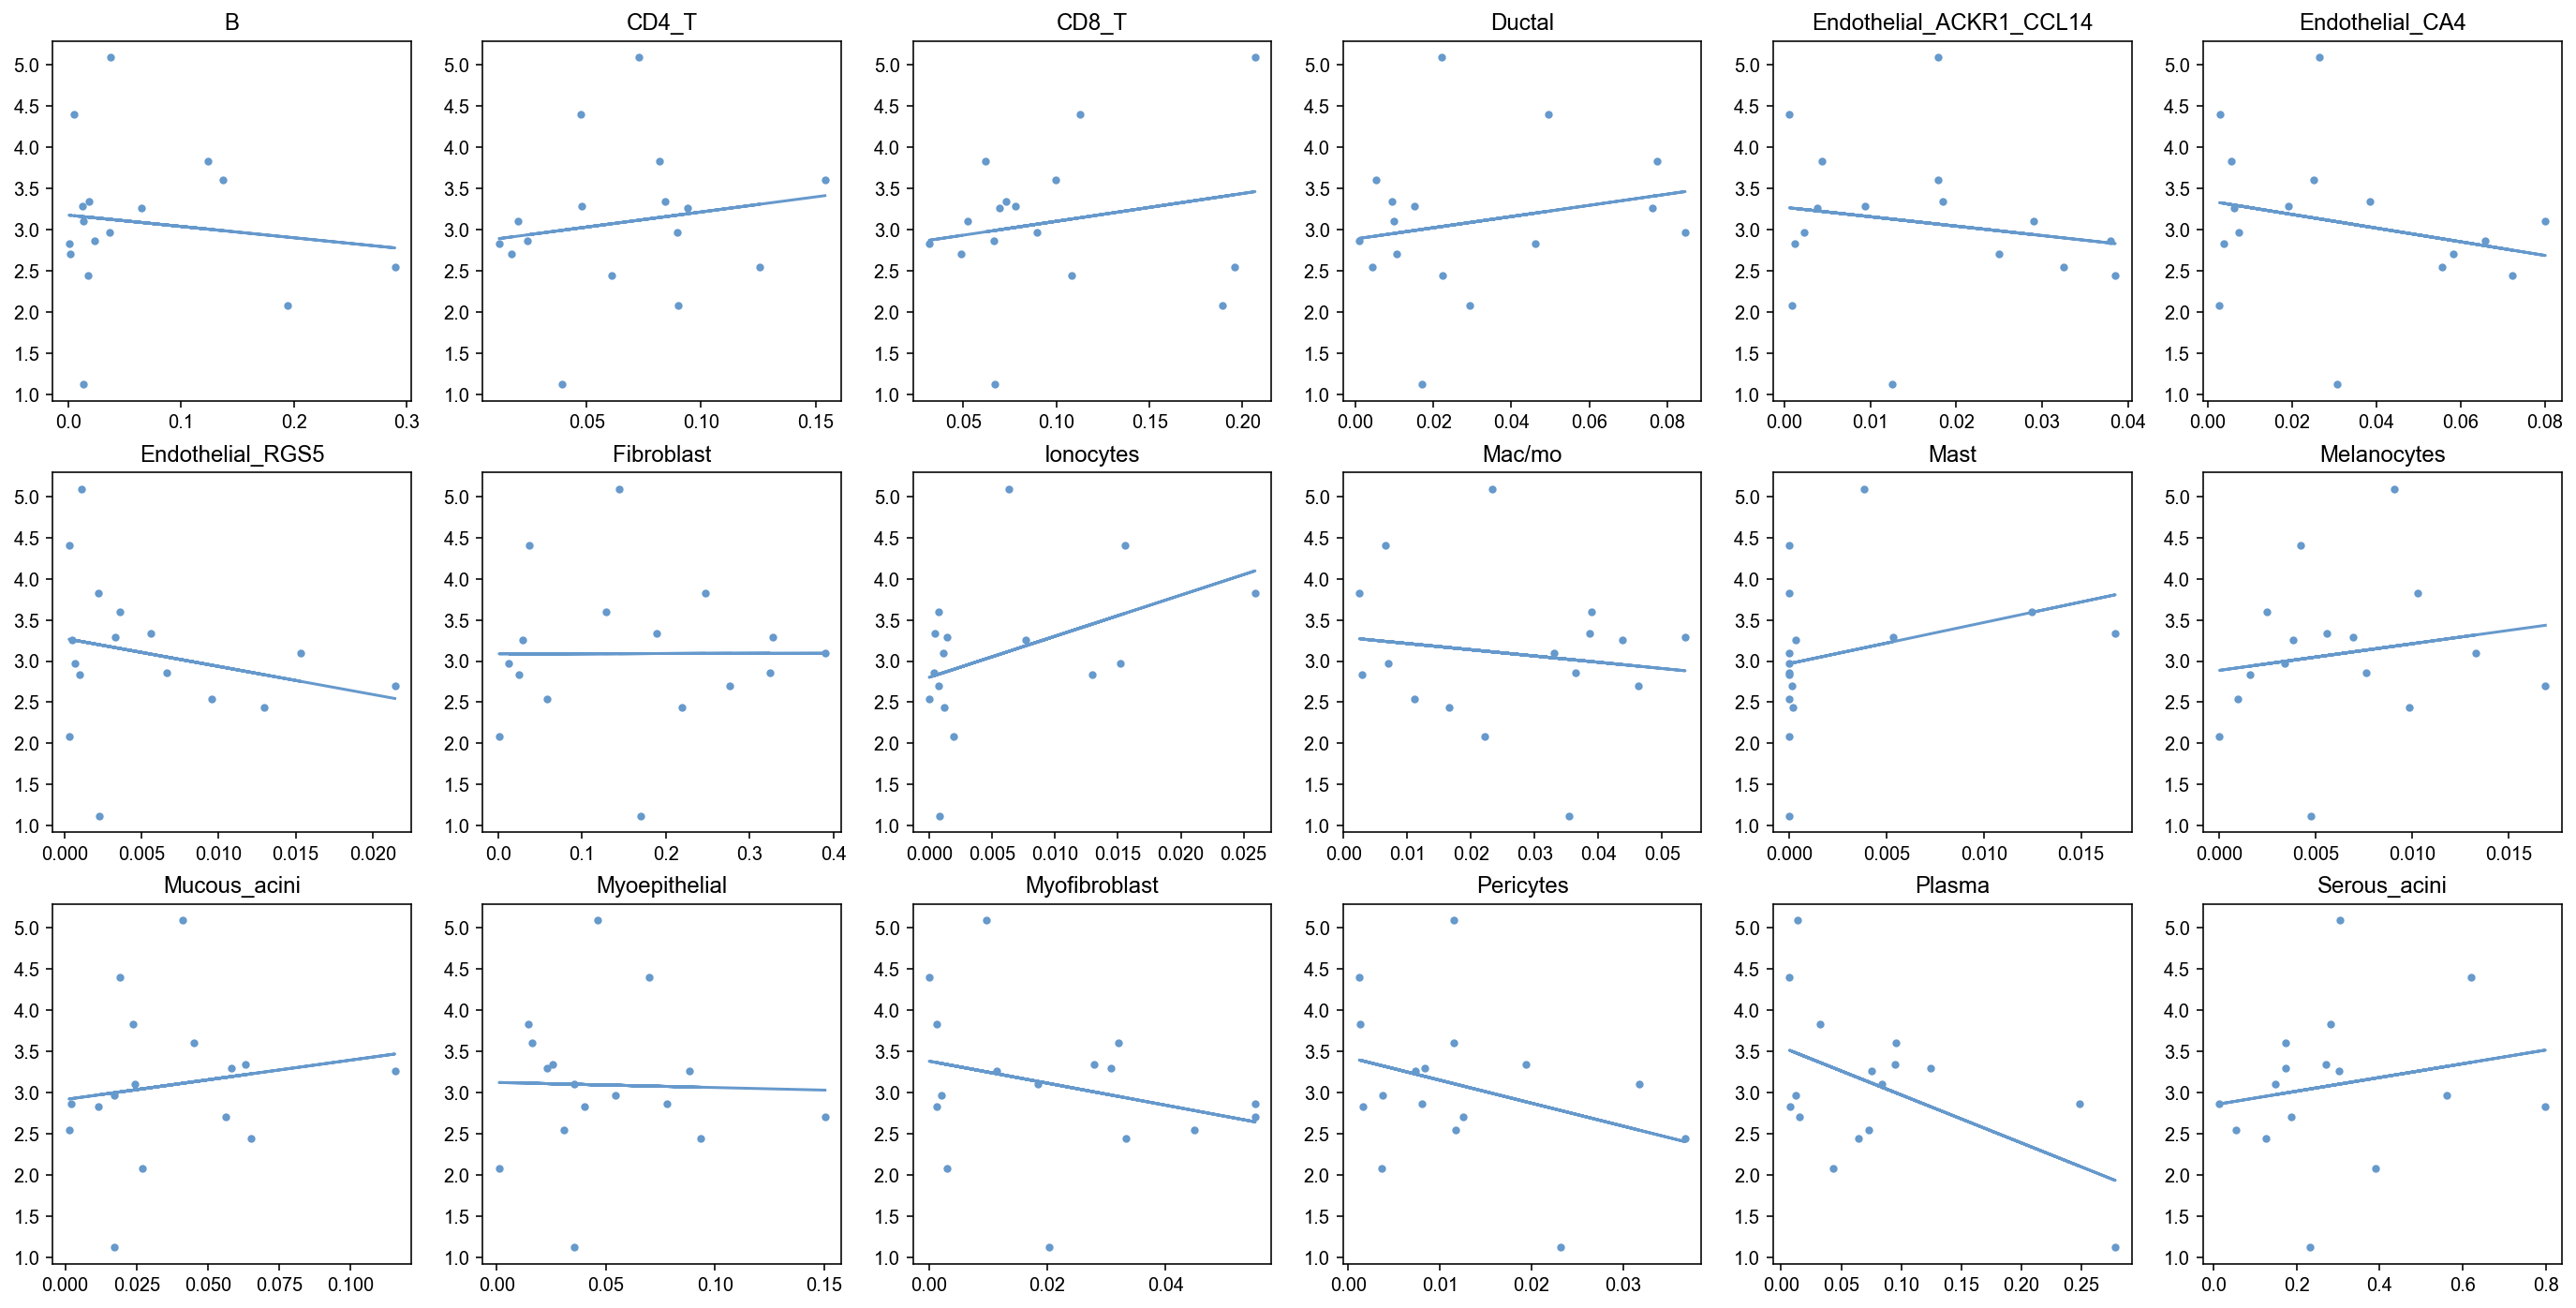

In [18]:
### neutral
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, cell in enumerate(cell_types):
    plot_df1=ratio_df[cell]
    plot_df2=meta_df['neutral']
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([cell,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(cell)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/CellRatio_neutral_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['celltype','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/CellRatio_neutral_correlation.csv',index=None)
#

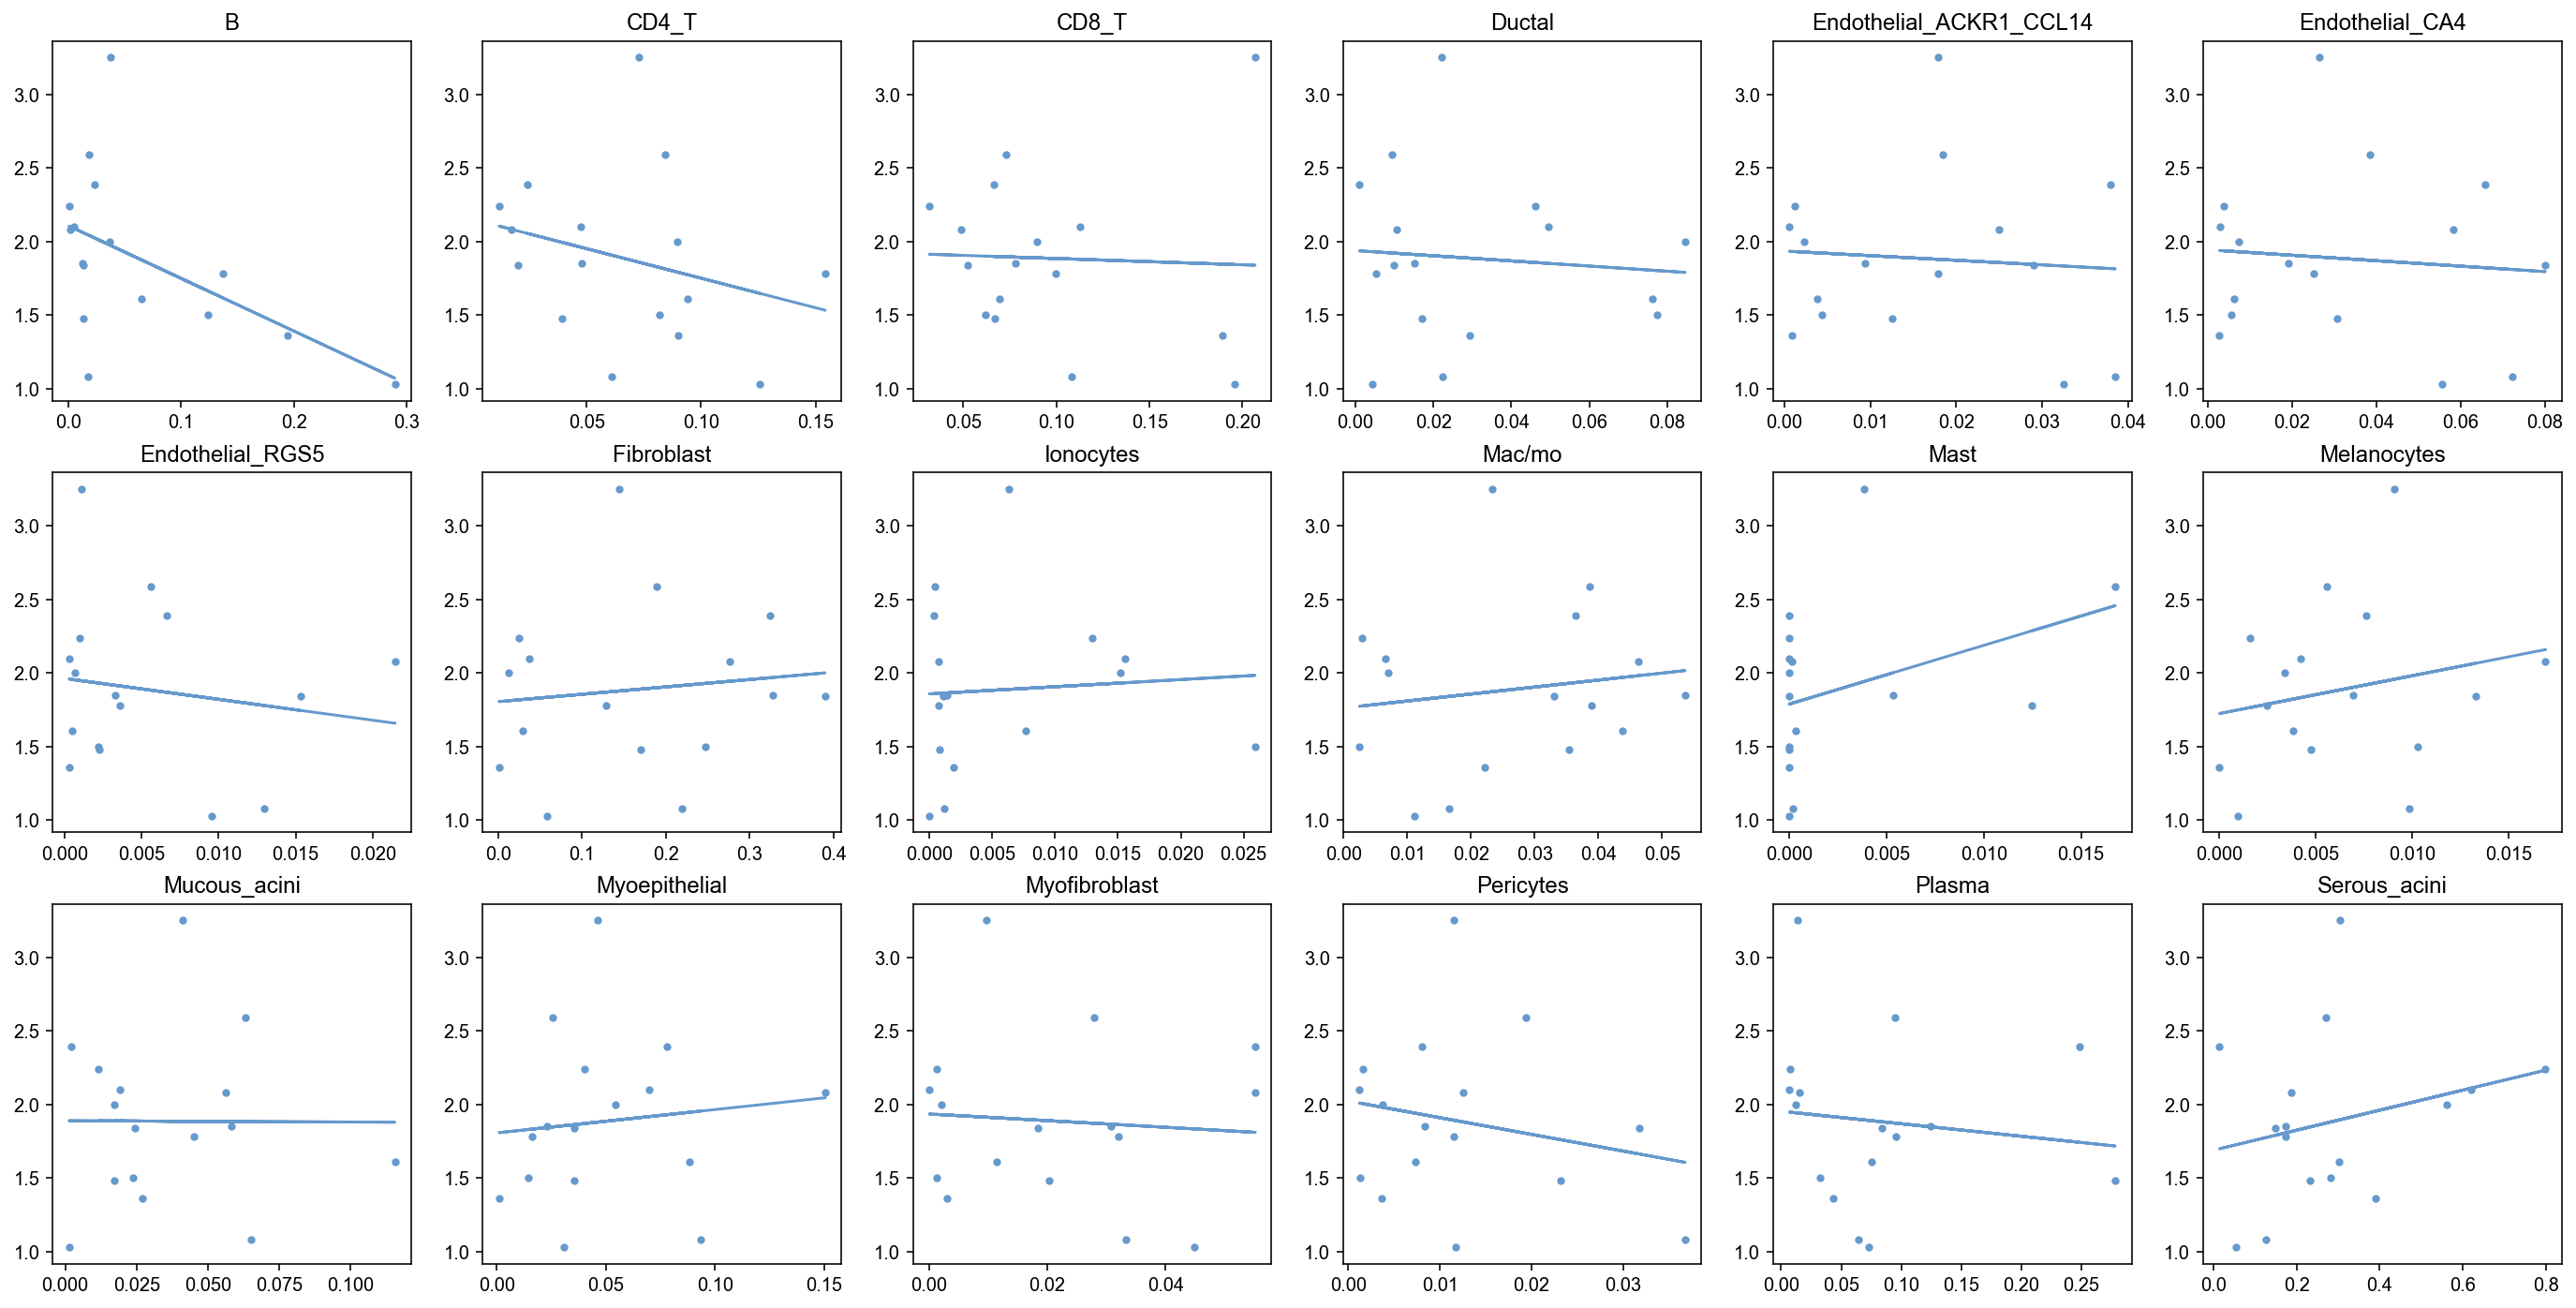

In [19]:
### lymph
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, cell in enumerate(cell_types):
    plot_df1=ratio_df[cell]
    plot_df2=meta_df['lymph']
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([cell,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(cell)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
plt.savefig('./analysis_result/corr_clinical/CellRatio_lymph_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['celltype','pval','correlation']
sta_df.to_csv('./analysis_result/corr_clinical/CellRatio_lymph_correlation.csv',index=None)
#

# Computing correlation between basic info and clinical info 

In [23]:
#compute p_value of all genes in states (based control)
#
def stat_twoSamples(x, y):
    from scipy import stats
    return stats.ttest_ind(x,y)
    #from scipy.stats import ranksums
    #return ranksums(x, y)
#
def analysis_genes_new(genes:list,base='Control', key='Condition'):
    """
    """
    FINAL_RESULT = []
    for gene in genes:
        PERGENE_RESULT = list()
        PERGENE_RESULT.extend([gene])
        print('For gene: %s' % gene)
        mtx_df = meta_df.loc[:,[key,gene]]
        base_array = mtx_df[mtx_df[key]==base][gene].values
        base_array = base_array[~np.isnan(base_array)]
        for item in ['Patient']:
            if item == base:
                continue
            comparison_array = mtx_df[mtx_df[key]==item][gene].values
            comparison_array = comparison_array[~np.isnan(comparison_array)]
            stat, pval = stat_twoSamples(comparison_array, base_array)
            PERGENE_RESULT.extend([stat, pval])
        ### ------------------------------------------------------
        FINAL_RESULT.append(PERGENE_RESULT)
    return pd.DataFrame(FINAL_RESULT, columns=['clinical', 'stat', 'pval'])
def analysis_genes_new2(genes:list,base='male', key='sex'):
    """
    """
    FINAL_RESULT = []
    for gene in genes:
        PERGENE_RESULT = list()
        PERGENE_RESULT.extend([gene])
        print('For gene: %s' % gene)
        mtx_df = meta_df.loc[:,[key,gene]]
        base_array = mtx_df[mtx_df[key]==base][gene].values
        base_array = base_array[~np.isnan(base_array)]
        for item in ['female']:
            if item == base:
                continue
            comparison_array = mtx_df[mtx_df[key]==item][gene].values
            comparison_array = comparison_array[~np.isnan(comparison_array)]
            stat, pval = stat_twoSamples(comparison_array, base_array)
            PERGENE_RESULT.extend([stat, pval])
        ### ------------------------------------------------------
        FINAL_RESULT.append(PERGENE_RESULT)
    return pd.DataFrame(FINAL_RESULT, columns=['clinical', 'stat', 'pval'])

In [26]:
meta_df=pd.read_csv('./data/refined_clinical_info.csv',index_col='sample_ID')
meta_df

,serial number,Condition,Sample type,sex,age,course of disease,Focus score,Salivary flow rate,ESSDAI score,WBC,...,RF(IU/ml),IgG(g/l),High IgG(>16),IgM(g/l),IgA(g/l),globulin(g/L),C4(mg/dl),C3(mg/dl),ESR(mm/hr),CRP(mg/l)
sample_ID,,,,,,,,,,,,,,,,,,,,,
XNCX_1,1,Patient,gland-blood,female,56,5.0,1,2.104,1.0,3.86,...,9.69,20.00,+,1.20,3.43,40.0,0.35,1.38,37,3.14
XNCX_2,2,Patient,gland,female,70,3.0,1,0.368,9.0,4.14,...,16.80,21.70,+,1.63,2.59,41.4,0.19,1.02,51,3.14
XNCX_3,3,Patient,gland-blood,female,33,0.1,1,1.230,8.0,2.92,...,NaN,26.68,+,2.45,4.99,43.6,0.17,0.71,44,3.14
XNCX_4,4,Patient,gland,female,40,0.5,1,1.560,4.0,5.43,...,44.30,33.30,+,1.46,5.32,51.1,0.15,1.24,44,3.13
XNCX_5,5,Patient,gland,female,52,2.0,1,1.417,0.0,5.54,...,9.19,11.40,-,1.29,2.34,28.3,0.18,1.12,13,3.13
XNCX_6,6,Patient,gland,female,52,0.1,1,2.030,14.0,6.21,...,9.20,20.77,+,1.87,3.12,39.7,0.24,1.63,80,72.10
XNCX_7,7,Patient,gland,female,73,0.1,1,2.560,10.0,9.37,...,9.19,12.58,-,3.44,3.22,32.2,0.24,1.08,26,3.13
XNCX_8,8,Patient,gland,female,29,0.5,1,1.040,0.0,6.64,...,NaN,11.99,-,1.37,1.53,29.3,0.44,1.94,23,6.38
XNCX_9,9,Patient,gland,female,34,0.1,1,4.670,2.0,5.86,...,9.19,23.45,+,1.70,2.78,NaN,0.32,1.08,52,9.15


In [10]:
types

['course of disease',
 'Focus score',
 'Salivary flow rate',
 'ESSDAI score',
 'WBC',
 'HGB',
 'PLT',
 'neutral',
 'lymph',
 'RF(IU/ml)',
 'IgG(g/l)',
 'IgM(g/l)',
 'IgA(g/l)',
 'globulin(g/L)',
 'C4(mg/dl)',
 'C3(mg/dl)',
 'ESR(mm/hr)',
 'CRP(mg/l)']

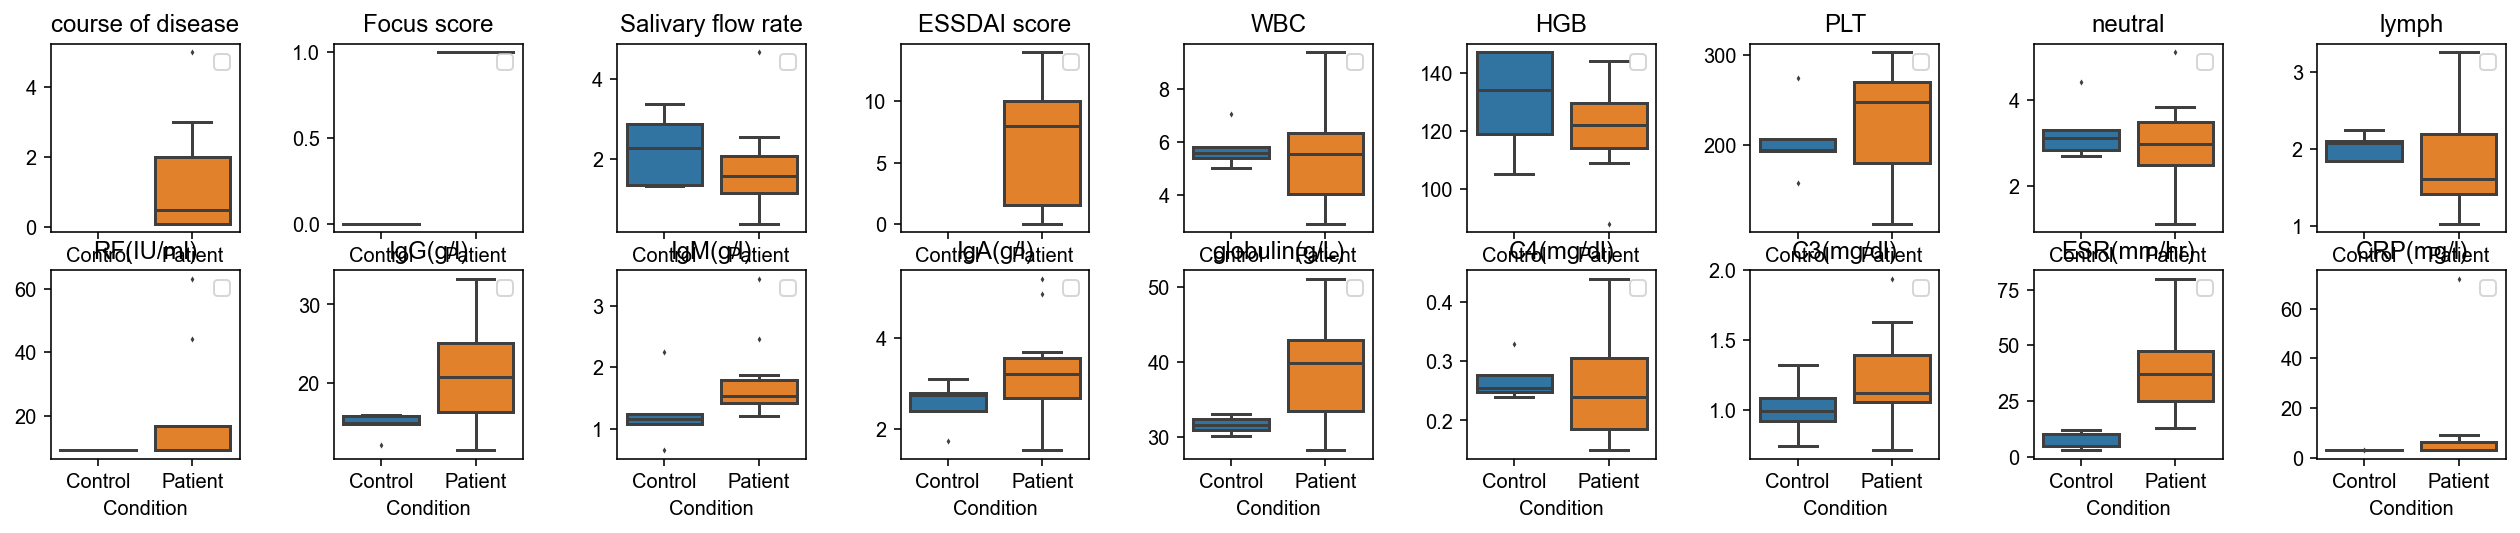

In [11]:
###
fig, axes = plt.subplots(nrows=2, ncols=9, figsize=(22, 6))

axes = axes.flatten()

for i, _type in enumerate(types):
    sns.boxplot(x='Condition', y=_type, ax=axes[i]
                ,data=meta_df,order=['Control','Patient']
                ,palette=['#1f77b4','#ff7f0e'],fliersize=0.8)
    axes[i].legend([])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    if i!=0:
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel('')
    axes[i].set_title(_type)
plt.subplots_adjust(bottom=0.4, wspace=0.5)
plt.savefig('./analysis_result/corr_clinical/Condition_ClinicalInfo.pdf')

In [19]:
New_res = analysis_genes_new(genes=types)
New_res.to_csv('./analysis_result/corr_clinical/Condition_ClinicalInfo.csv',index=None)

For gene: course of disease
For gene: Focus score
For gene: Salivary flow rate
For gene: ESSDAI score
For gene: WBC
For gene: HGB
For gene: PLT
For gene: neutral
For gene: lymph
For gene: RF(IU/ml)
For gene: IgG(g/l)
For gene: IgM(g/l)
For gene: IgA(g/l)
For gene: globulin(g/L)
For gene: C4(mg/dl)
For gene: C3(mg/dl)
For gene: ESR(mm/hr)
For gene: CRP(mg/l)


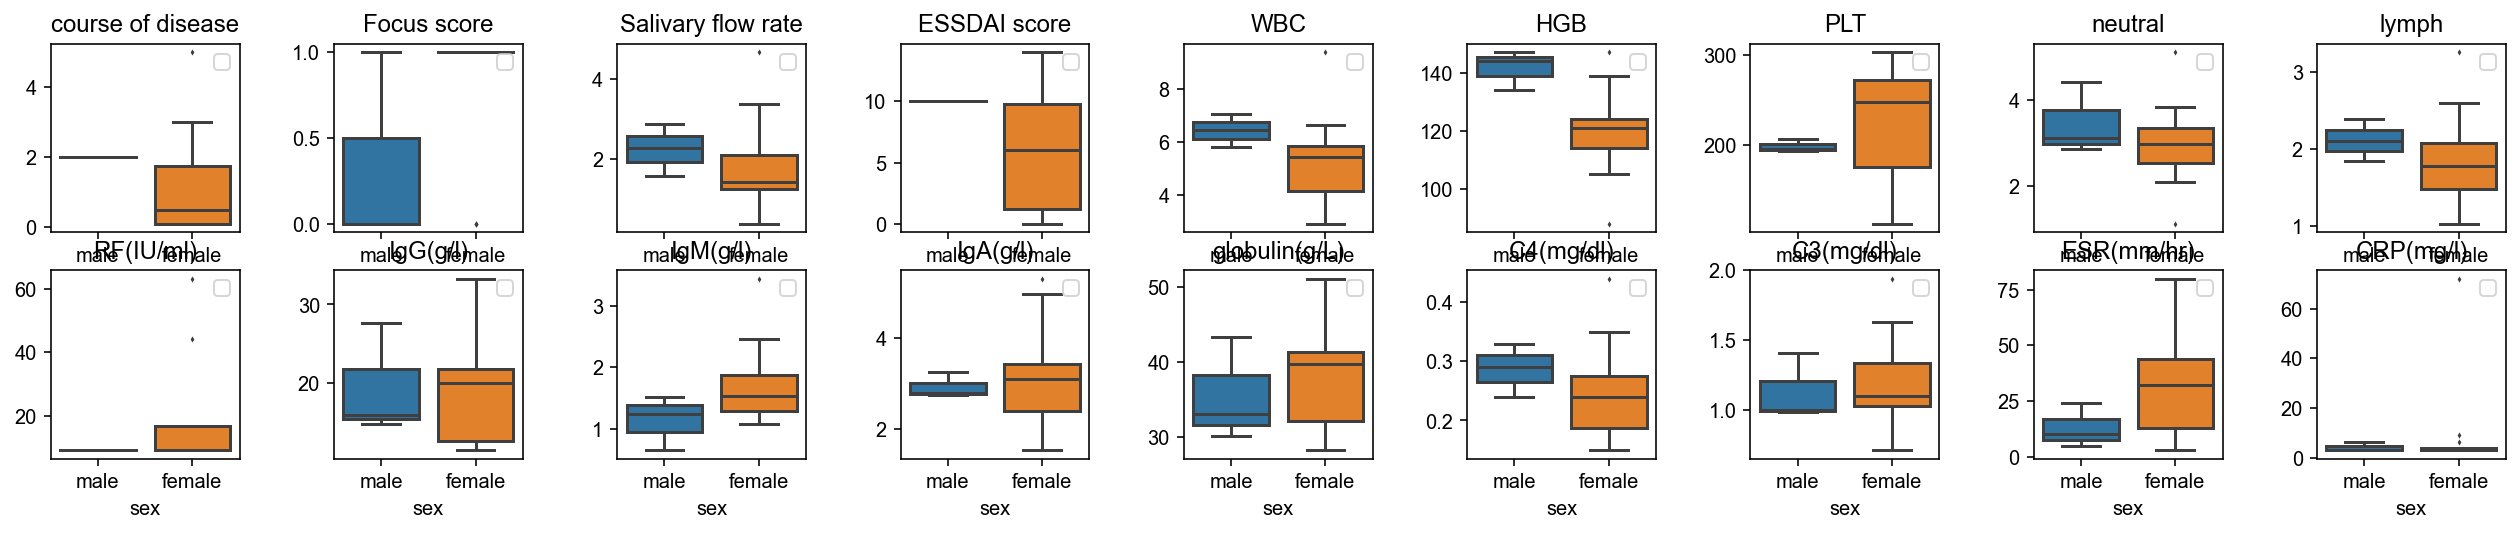

In [22]:
###
fig, axes = plt.subplots(nrows=2, ncols=9, figsize=(22, 6))

axes = axes.flatten()

for i, _type in enumerate(types):
    sns.boxplot(x='sex', y=_type, ax=axes[i]
                ,data=meta_df,order=['male','female'],fliersize=0.8)
    axes[i].legend([])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    if i!=0:
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel('')
    axes[i].set_title(_type)
plt.subplots_adjust(bottom=0.4, wspace=0.5)
plt.savefig('./analysis_result/corr_clinical/Sex_ClinicalInfo.pdf')

In [24]:
New_res = analysis_genes_new2(genes=types)
New_res.to_csv('./analysis_result/corr_clinical/sex_ClinicalInfo.csv',index=None)

For gene: course of disease
For gene: Focus score
For gene: Salivary flow rate
For gene: ESSDAI score
For gene: WBC
For gene: HGB
For gene: PLT
For gene: neutral
For gene: lymph
For gene: RF(IU/ml)
For gene: IgG(g/l)
For gene: IgM(g/l)
For gene: IgA(g/l)
For gene: globulin(g/L)
For gene: C4(mg/dl)
For gene: C3(mg/dl)
For gene: ESR(mm/hr)
For gene: CRP(mg/l)


/home/caipengfei/miniconda3/envs/multiclustering/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/caipengfei/miniconda3/envs/multiclustering/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Computing correlation between interesting genes/pathways

## epithelial-related

In [30]:
#
exp_df=pd.read_csv('./data/s04_cx_epi_degs_go_score_by_sample.csv',index_col=0)
#
meta_df=pd.read_csv('./data/refined_clinical_info.csv',index_col='sample_ID')
meta_df=meta_df.loc[exp_df.index]
#

In [34]:
exp_df.head()

,Salivary secretion,regulation of cell cycle process,epithelial cell differentiation,Antigen processing and presentation,response to interferon-beta,Oxidative phosphorylation
sample,,,,,,
HCCX_1,0.207338,0.081101,0.124218,0.234372,0.008456,0.105222
HCCX_2,0.235088,0.026234,0.082318,0.221207,-0.045363,0.173201
HCCX_3,0.222577,0.036676,0.101255,0.283475,0.001827,0.121431
HCCX_4,0.187665,0.013414,0.090058,0.331113,-0.021529,0.182249
HCCX_5,0.181213,0.050120,0.092499,0.250130,-0.036331,0.156186


In [33]:
meta_df.head()

,serial number,Condition,Sample type,sex,age,course of disease,Focus score,Salivary flow rate,ESSDAI score,WBC,...,RF(IU/ml),IgG(g/l),High IgG(>16),IgM(g/l),IgA(g/l),globulin(g/L),C4(mg/dl),C3(mg/dl),ESR(mm/hr),CRP(mg/l)
sample,,,,,,,,,,,,,,,,,,,,,
HCCX_1,15,Control,gland,female,31,NaN,0,1.31,NaN,5.03,...,NaN,12.00,-,1.08,2.39,NaN,0.26,0.74,3,3.30
HCCX_2,16,Control,gland,female,41,NaN,0,3.37,NaN,5.38,...,NaN,14.90,-,1.16,3.09,NaN,0.25,1.32,12,NaN
HCCX_3,17,Control,gland,male,28,NaN,0,2.88,NaN,5.80,...,9.19,14.71,-,1.24,2.75,30.2,0.33,1.00,10,3.13
HCCX_4,18,Control,gland,female,50,NaN,0,1.34,NaN,5.57,...,9.19,15.73,-,2.24,1.74,NaN,NaN,NaN,5,3.13
HCCX_5,19,Control,gland,male,32,NaN,0,2.26,NaN,7.04,...,9.19,15.94,-,0.65,2.79,33.1,0.24,0.98,5,3.13


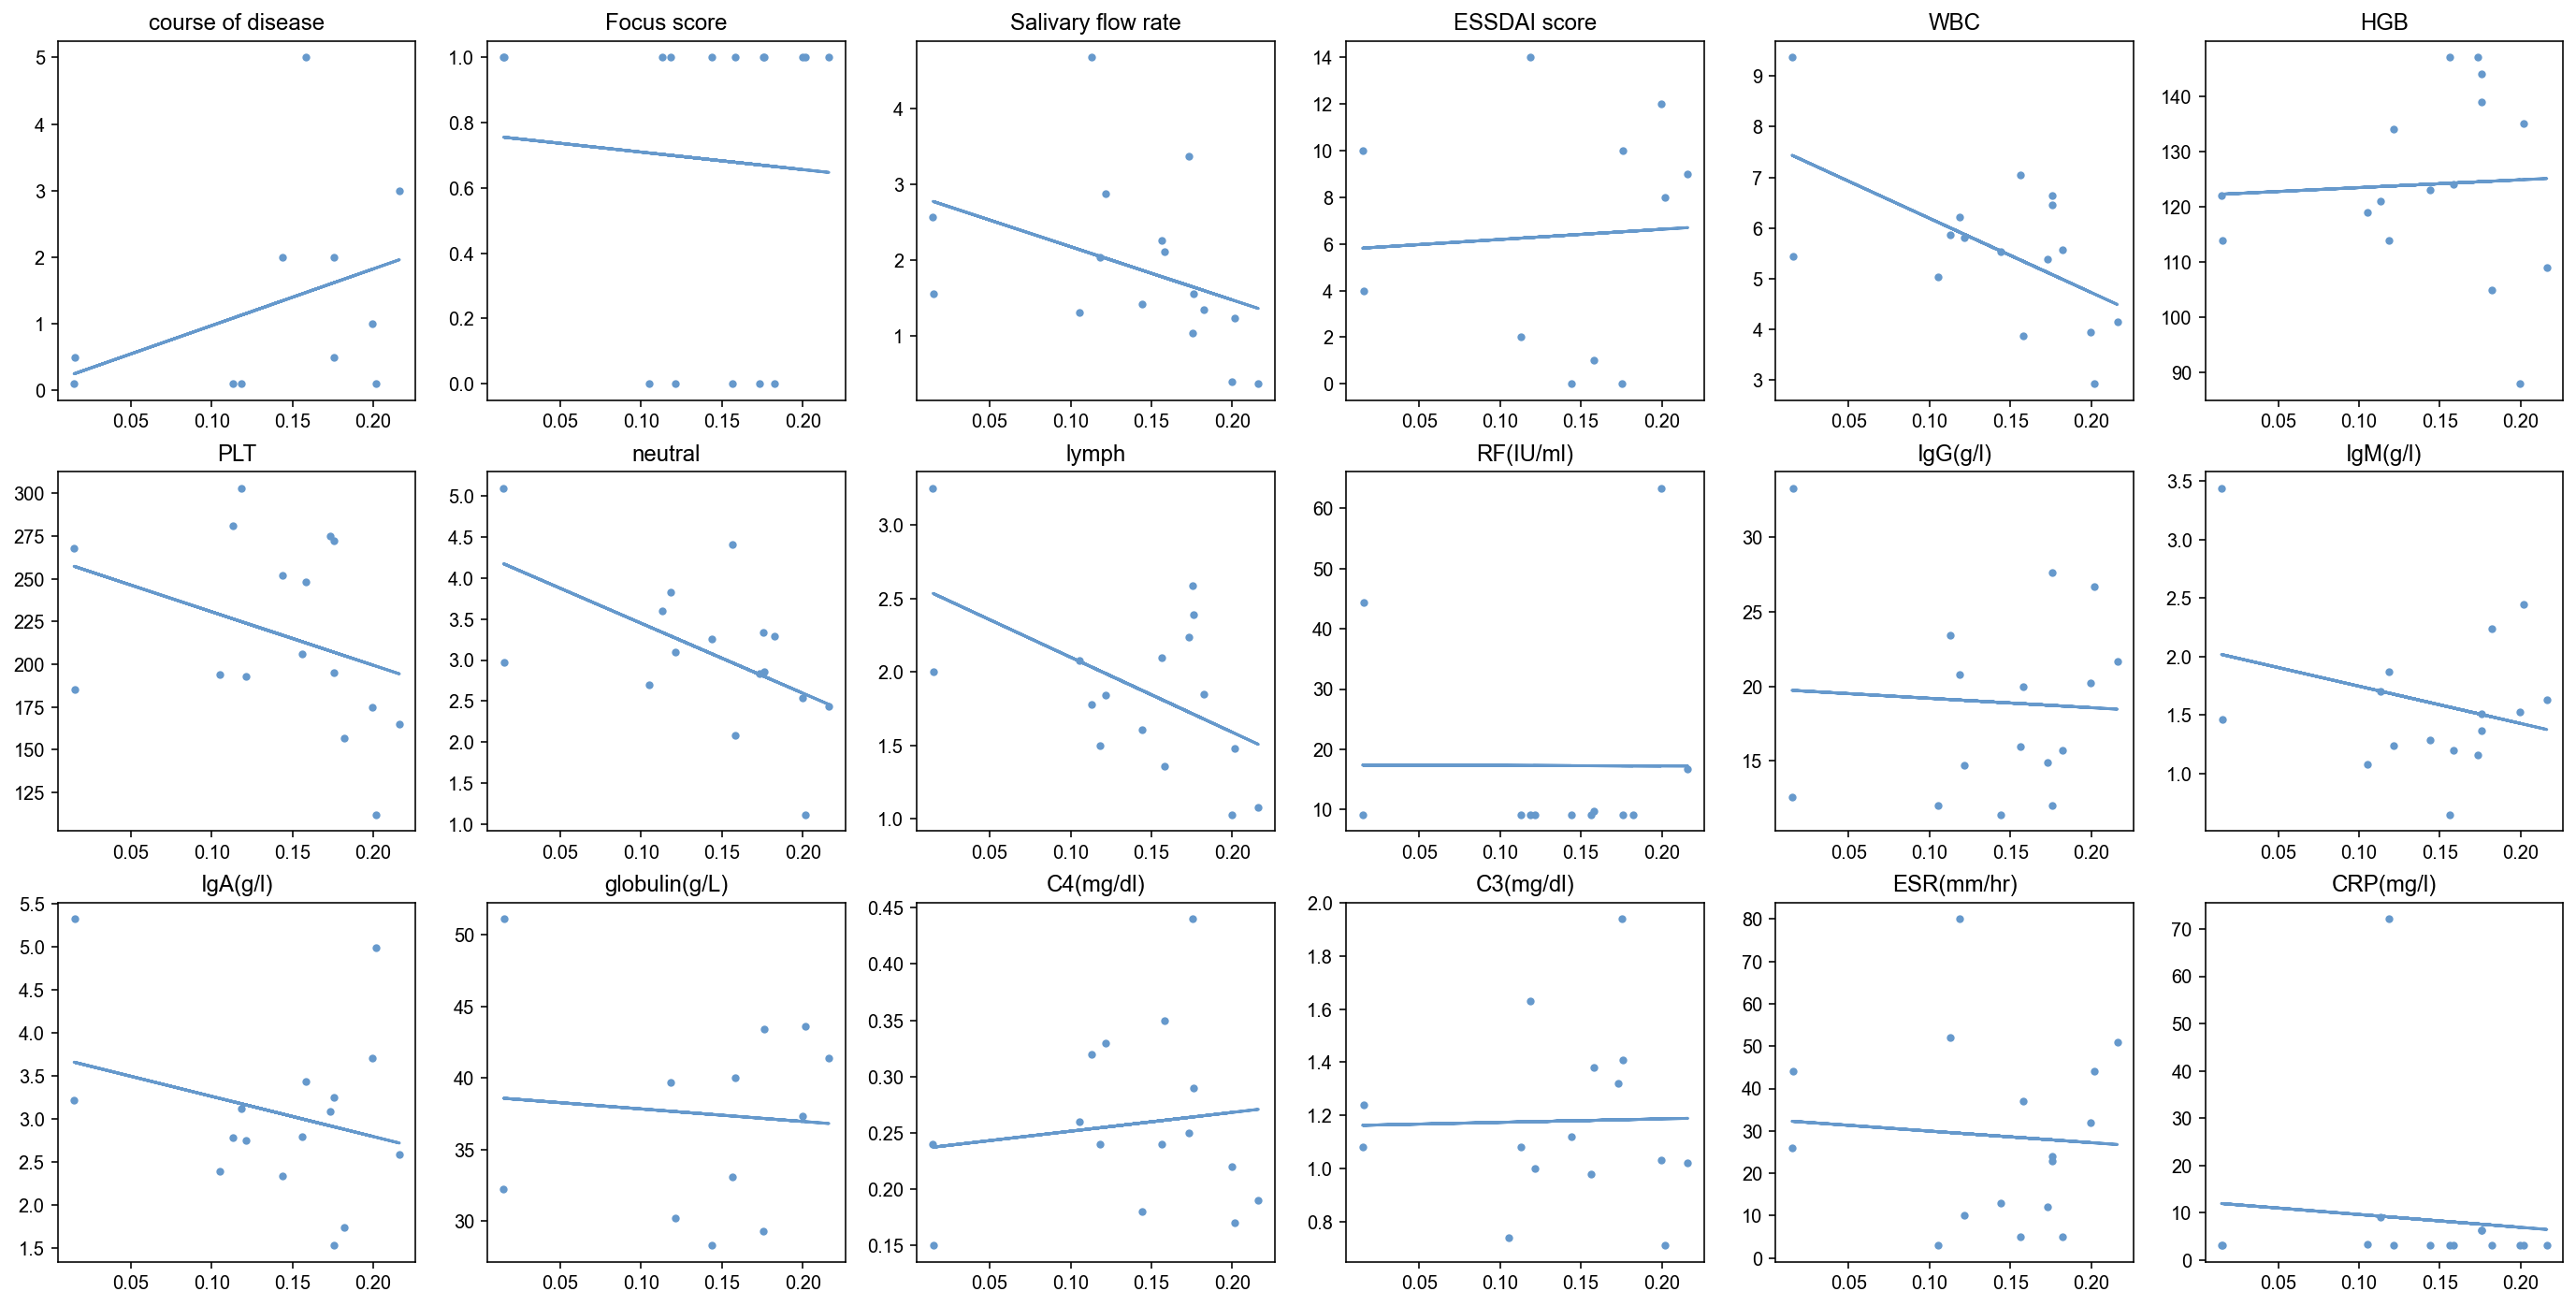

In [39]:
### gene score (pathway) and clinical info
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, gene in enumerate(types):
    plot_df1=exp_df['Oxidative phosphorylation']
    plot_df2=meta_df[gene]
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([gene,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(gene)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
#plt.savefig('./analysis_result/corr_clinical/Salivary-secretion_ClinicalInfo_correlation.pdf')
#plt.savefig('./analysis_result/corr_clinical/regulation of cell cycle process_ClinicalInfo_correlation.pdf')
#plt.savefig('./analysis_result/corr_clinical/epithelial cell differentiation_ClinicalInfo_correlation.pdf')
#plt.savefig('./analysis_result/corr_clinical/Antigen processing and presentation_ClinicalInfo_correlation.pdf')
#plt.savefig('./analysis_result/corr_clinical/response to interferon-beta_ClinicalInfo_correlation.pdf')
plt.savefig('./analysis_result/corr_clinical/Oxidative phosphorylation_ClinicalInfo_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['clinical','pval','correlation']
#sta_df.to_csv('./analysis_result/corr_clinical/Salivary-secretion_ClinicalInfo_correlation.csv',index=None)
#sta_df.to_csv('./analysis_result/corr_clinical/regulation of cell cycle process_ClinicalInfo_correlation.csv',index=None)
#sta_df.to_csv('./analysis_result/corr_clinical/epithelial cell differentiation_ClinicalInfo_correlation.csv',index=None)
#sta_df.to_csv('./analysis_result/corr_clinical/Antigen processing and presentation_ClinicalInfo_correlation.csv',index=None)
#sta_df.to_csv('./analysis_result/corr_clinical/response to interferon-beta_ClinicalInfo_correlation.csv',index=None)
sta_df.to_csv('./analysis_result/corr_clinical/Oxidative phosphorylation_ClinicalInfo_correlation.csv',index=None)
#

## endothelial-related

In [6]:
#
exp_df=pd.read_csv('./data/cx_endo_sel_geneset_sample_mean_expr.csv',index_col=0)
#
meta_df=pd.read_csv('./data/refined_clinical_info.csv',index_col='sample_ID')
meta_df=meta_df.loc[exp_df.index]

In [8]:
exp_df.head()

,metabolism_of_lipids_mean,leukocyte_transendo_mean
sample,,
HCCX_1,0.107882,0.257988
HCCX_2,0.109694,0.233701
HCCX_3,0.112025,0.265647
HCCX_4,0.124909,0.277896
HCCX_5,0.101464,0.228599


In [9]:
meta_df.head()

,serial number,Condition,Sample type,sex,age,course of disease,Focus score,Salivary flow rate,ESSDAI score,WBC,...,RF(IU/ml),IgG(g/l),High IgG(>16),IgM(g/l),IgA(g/l),globulin(g/L),C4(mg/dl),C3(mg/dl),ESR(mm/hr),CRP(mg/l)
sample,,,,,,,,,,,,,,,,,,,,,
HCCX_1,15,Control,gland,female,31,NaN,0,1.31,NaN,5.03,...,NaN,12.00,-,1.08,2.39,NaN,0.26,0.74,3,3.30
HCCX_2,16,Control,gland,female,41,NaN,0,3.37,NaN,5.38,...,NaN,14.90,-,1.16,3.09,NaN,0.25,1.32,12,NaN
HCCX_3,17,Control,gland,male,28,NaN,0,2.88,NaN,5.80,...,9.19,14.71,-,1.24,2.75,30.2,0.33,1.00,10,3.13
HCCX_4,18,Control,gland,female,50,NaN,0,1.34,NaN,5.57,...,9.19,15.73,-,2.24,1.74,NaN,NaN,NaN,5,3.13
HCCX_5,19,Control,gland,male,32,NaN,0,2.26,NaN,7.04,...,9.19,15.94,-,0.65,2.79,33.1,0.24,0.98,5,3.13


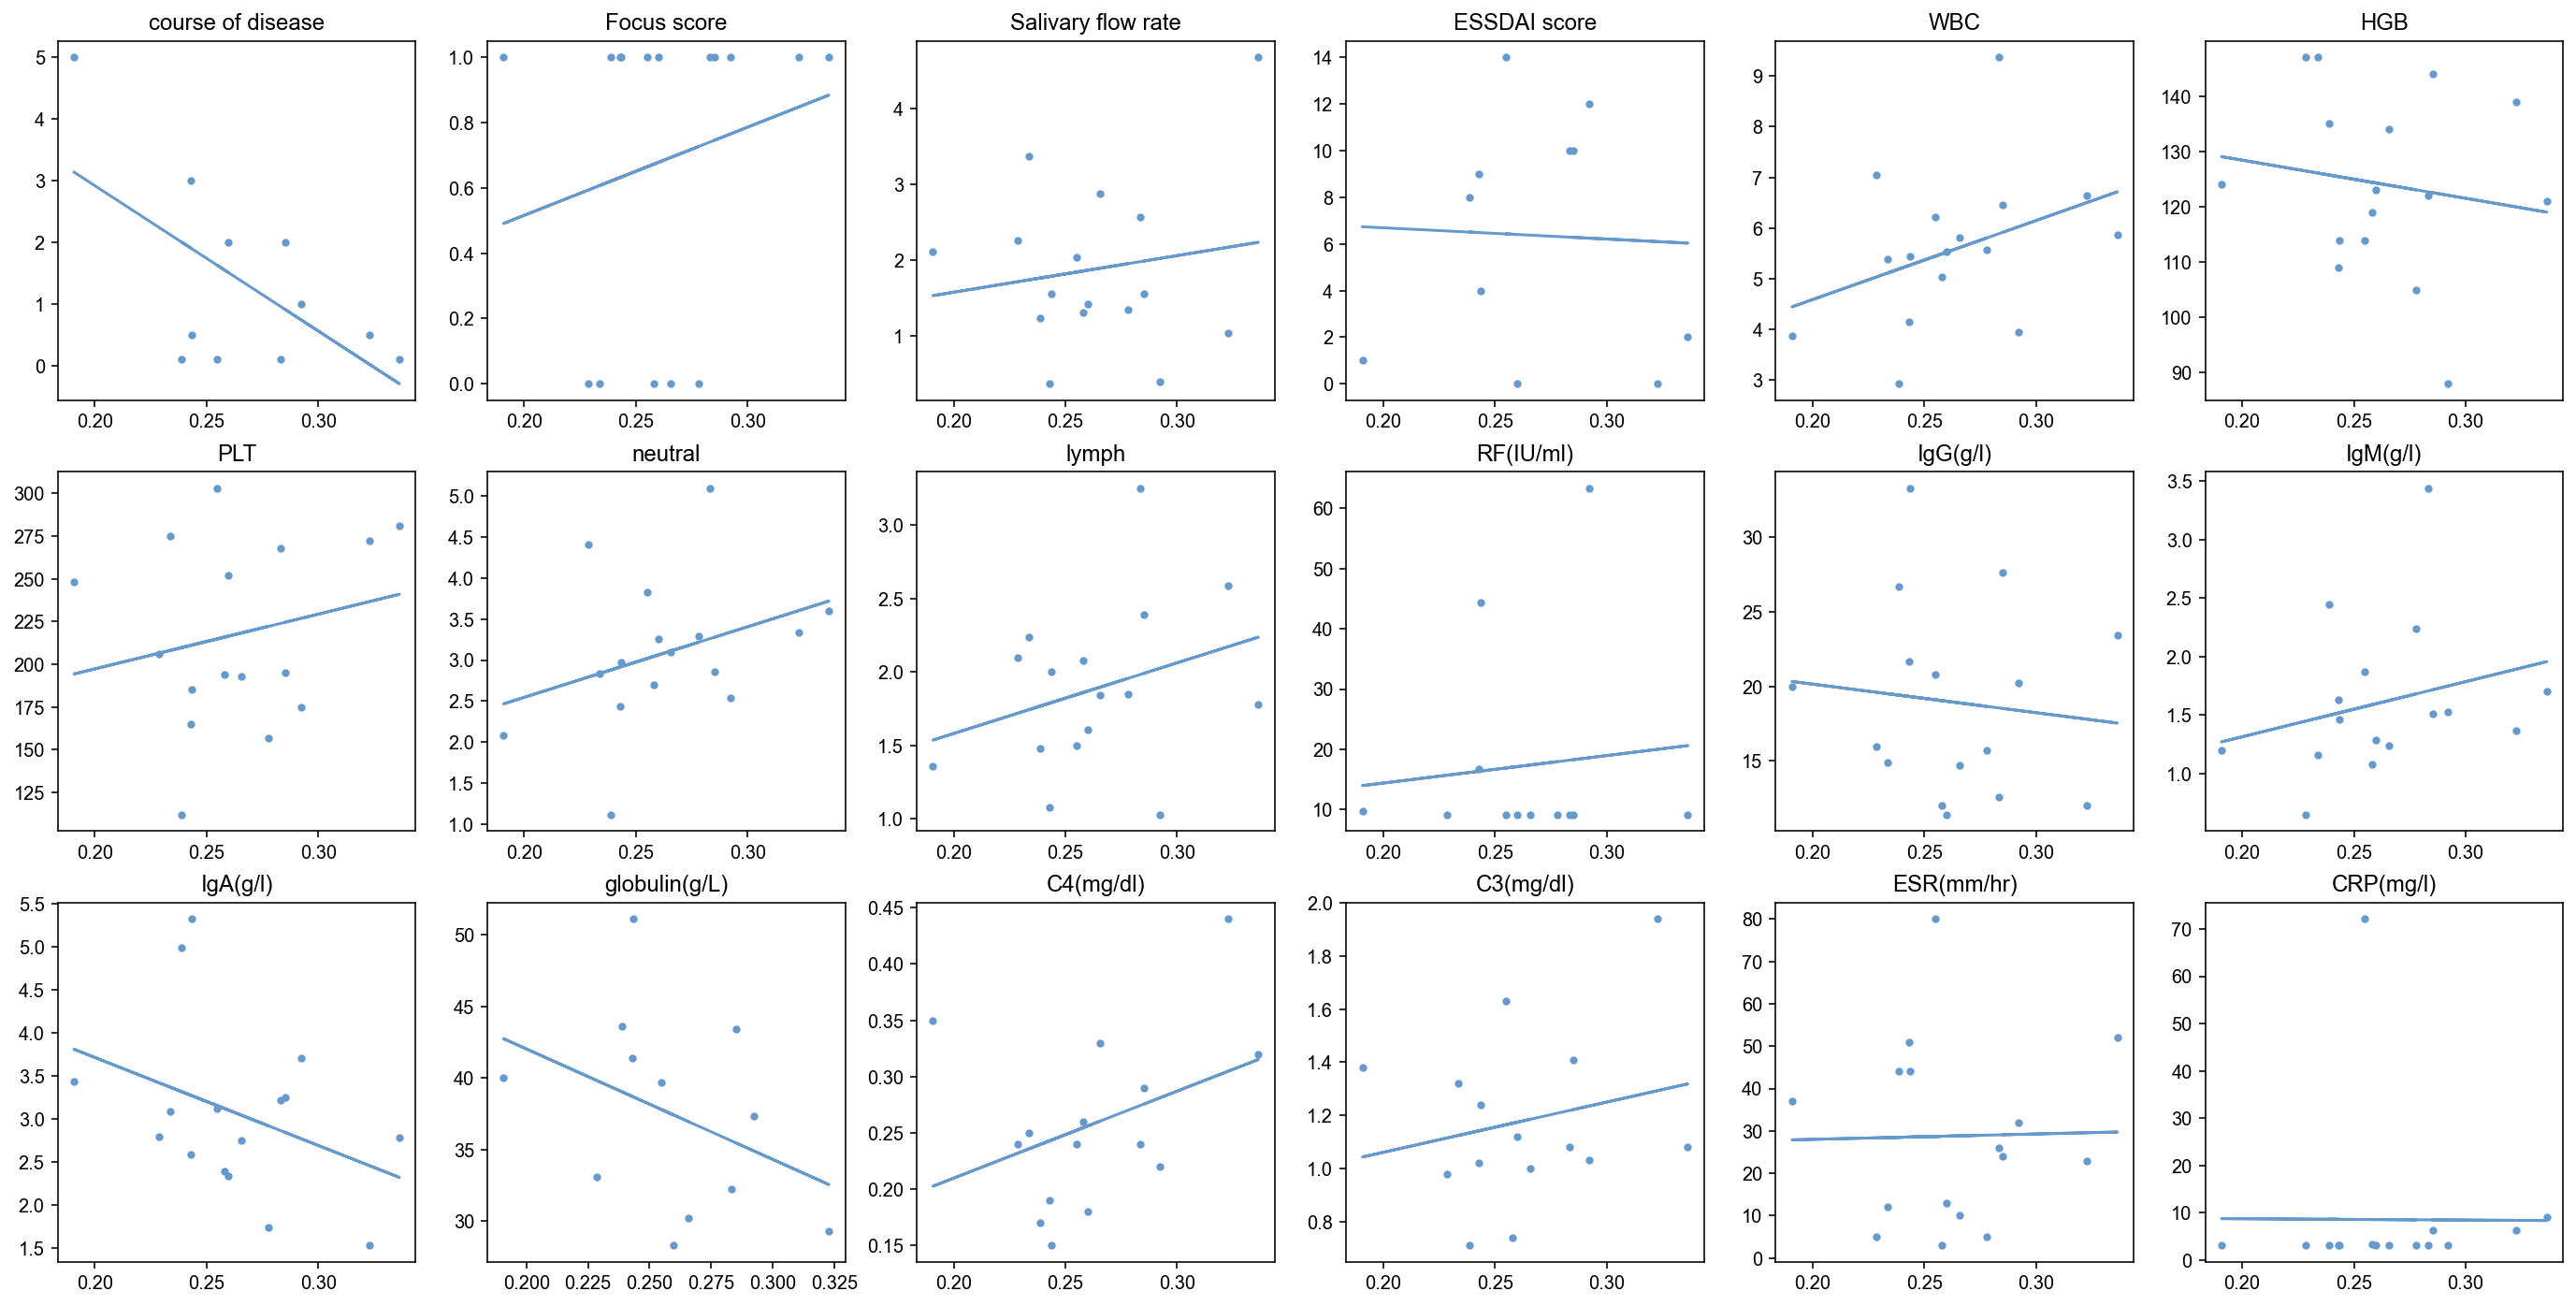

In [19]:
### gene score (pathway) and clinical info
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, gene in enumerate(types):
    plot_df1=exp_df['leukocyte_transendo_mean']
    plot_df2=meta_df[gene]
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([gene,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(gene)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
#plt.savefig('./analysis_result/corr_clinical/metabolism_of_lipids_ClinicalInfo_correlation.pdf')
plt.savefig('./analysis_result/corr_clinical/leukocyte_transendo_ClinicalInfo_correlation.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['clinical','pval','correlation']
#sta_df.to_csv('./analysis_result/corr_clinical/metabolism_of_lipids_ClinicalInfo_correlation.csv',index=None)
sta_df.to_csv('./analysis_result/corr_clinical/leukocyte_transendo_ClinicalInfo_correlation.csv',index=None)
#

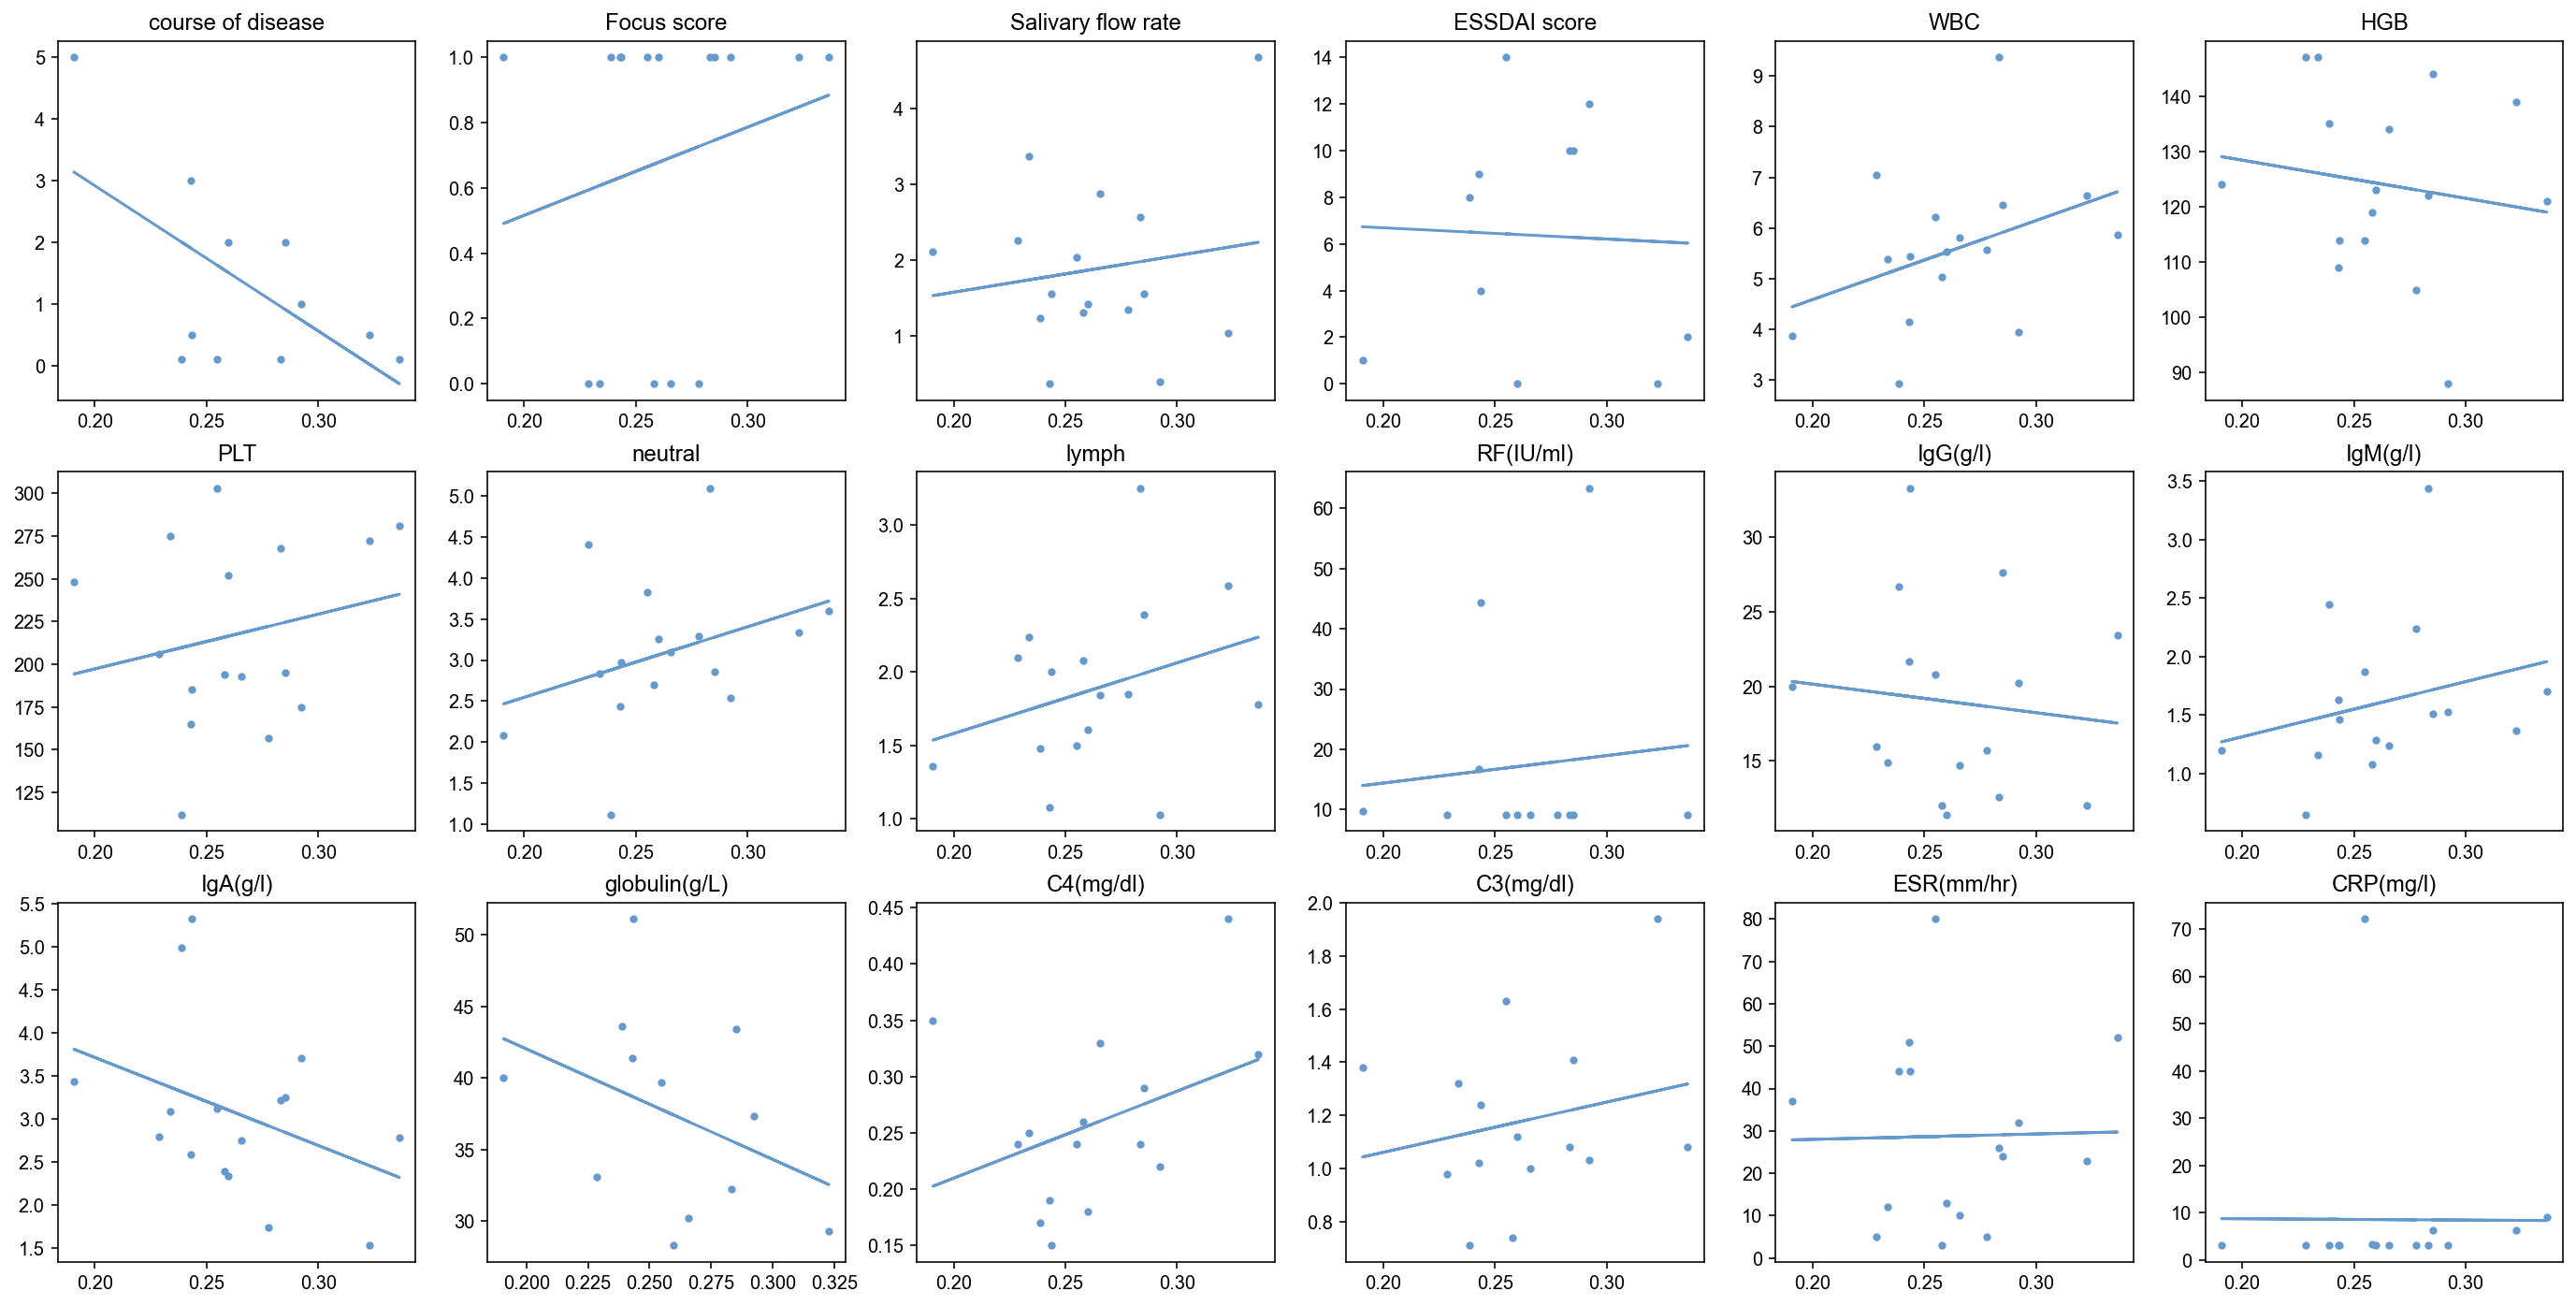

In [24]:
### gene score (pathway) and clinical info
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()
_list=[]
for i, gene in enumerate(types):
    plot_df1=exp_df['leukocyte_transendo_mean']
    plot_df2=meta_df[gene]
    plot_df=pd.DataFrame([plot_df1,plot_df2]).T
    plot_df.columns=['ratio','serum']
    plot_df=plot_df.dropna()
    #
    axes[i].scatter(plot_df.ratio.values, plot_df.serum.values,c='#6699CC', s=10)
    _pval, _rsquared, result, x = stat_single_OLS(plot_df)
    _list.append([gene,_pval,_rsquared])
    axes[i].plot(x,result.fittedvalues,'#6699CC')
    axes[i].set_title(gene)
    #axes[i].set_xlabel('Log normalized RNA expression')
    #axes[i].set_ylabel('expression in serum (pg/ml)')
#plt.savefig('./analysis_result/corr_clinical/metabolism_of_lipids_ClinicalInfo_correlation—spearman.pdf')
plt.savefig('./analysis_result/corr_clinical/leukocyte_transendo_ClinicalInfo_correlation—spearman.pdf')
### save statistics result
sta_df=pd.DataFrame(_list)
sta_df.columns=['clinical','pval','correlation']
#sta_df.to_csv('./analysis_result/corr_clinical/metabolism_of_lipids_ClinicalInfo_correlation—spearman.csv',index=None)
sta_df.to_csv('./analysis_result/corr_clinical/leukocyte_transendo_ClinicalInfo_correlation—spearman.csv',index=None)
#

In [19]:
import os

In [24]:
file_list = os.listdir('../scripts/CX_20211030/cpf_scripts/analysis_result/corr_clinical')

In [35]:
df_list = []
for f in file_list:
    if f.endswith('.csv'):
        tmp_df = pd.read_csv('../scripts/CX_20211030/cpf_scripts/analysis_result/corr_clinical/'+f)
        tmp_df.columns=['x','pval','cor']
        tmp_df['variable'] = f.split('.')[0]
        df_list.append(tmp_df)
df_concated = pd.concat(df_list,axis=0)

In [37]:
df_concated.to_csv('source_data/source_data_cli_cor.csv')